We see that our dataset is mad of $n=200$ and $p=16$. These are its main features for the subset of dataset and the first three rows

In [265]:
 load("icua.RData")
ls()
names(icua)
 mydata<-icua
dim(mydata)
mydata<-mydata[,c("status","age", "conscious", "service","previous")]

# verifica correttezza subset:
mydata[1:3,]

#verifica dimensione subset:
dim(mydata)

## AGGIUNGERE VARIABILE
#taking <- rep(1, length(mydata$budget))

## substitute 0 to the ones corresponding to cars with mpg lower than the med
#taking [mydata$box<20000000]=0
## create the dataset we need


#if you want to add a new variable into a mydata
#mydata<-data.frame(taking=taking ,mydata[,c("budget", "action", "cmngsoon")])
#mydata[1:3,]

mydata$status<-as.factor(mydata$status)
#mydata$conscious<-as.factor(mydata$conscious)
#mydata$service<-as.factor(mydata$service)
#mydata$previous<-as.factor(mydata$previous)

is.factor(mydata$status)
is.factor(mydata$conscious)
is.factor(mydata$service)
is.factor(mydata$previous)

[1] "X"                  "best.lambda"        "cv.lasso"          
 [4] "cv.ridge"           "data"               "est.probs"         
 [7] "est.values"         "icua"               "id.zero"           
[10] "m.gam"              "m.lasso"            "m.lasso.min"       
[13] "m.pcr"              "m.ridge"            "m.ridge.min"       
[16] "model.mydata"       "model.mydata.lda"   "model.mydata.qda"  
[19] "model.mydata.train" "model.mydata2"      "model.mydata3"     
[22] "model.mydata4"      "model.mydata5"      "model.mydata6"     
[25] "mse"                "mydata"             "n"                 
[28] "nonzero"            "pcr.pred"           "preds"             
[31] "preds.lda"          "preds.lda1"         "preds.qda"         
[34] "preds.qda1"         "preds.test"         "probs.test"        
[37] "selection"          "sum"                "test.set"          
[40] "training.set"       "values.roc1"        "values.roc2"       
[43] "values.roc3"        "x1.cv"              "x2"                
[46] "y"                  "y2"

[1] "sex"            "race"           "service"        "cancer"        
 [5] "renal"          "infection"      "cpr"            "previous"      
 [9] "pO2low"         "pHlow"          "pCO2hi"         "bicarbonateLow"
[13] "creatinineHi"   "status"         "age"            "conscious"

[1] 200  16

status,age,conscious,service,previous
0,27,Yes,Medical,No
0,59,Yes,Medical,Yes
0,77,Yes,Surgical,No


[1] 200   5

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

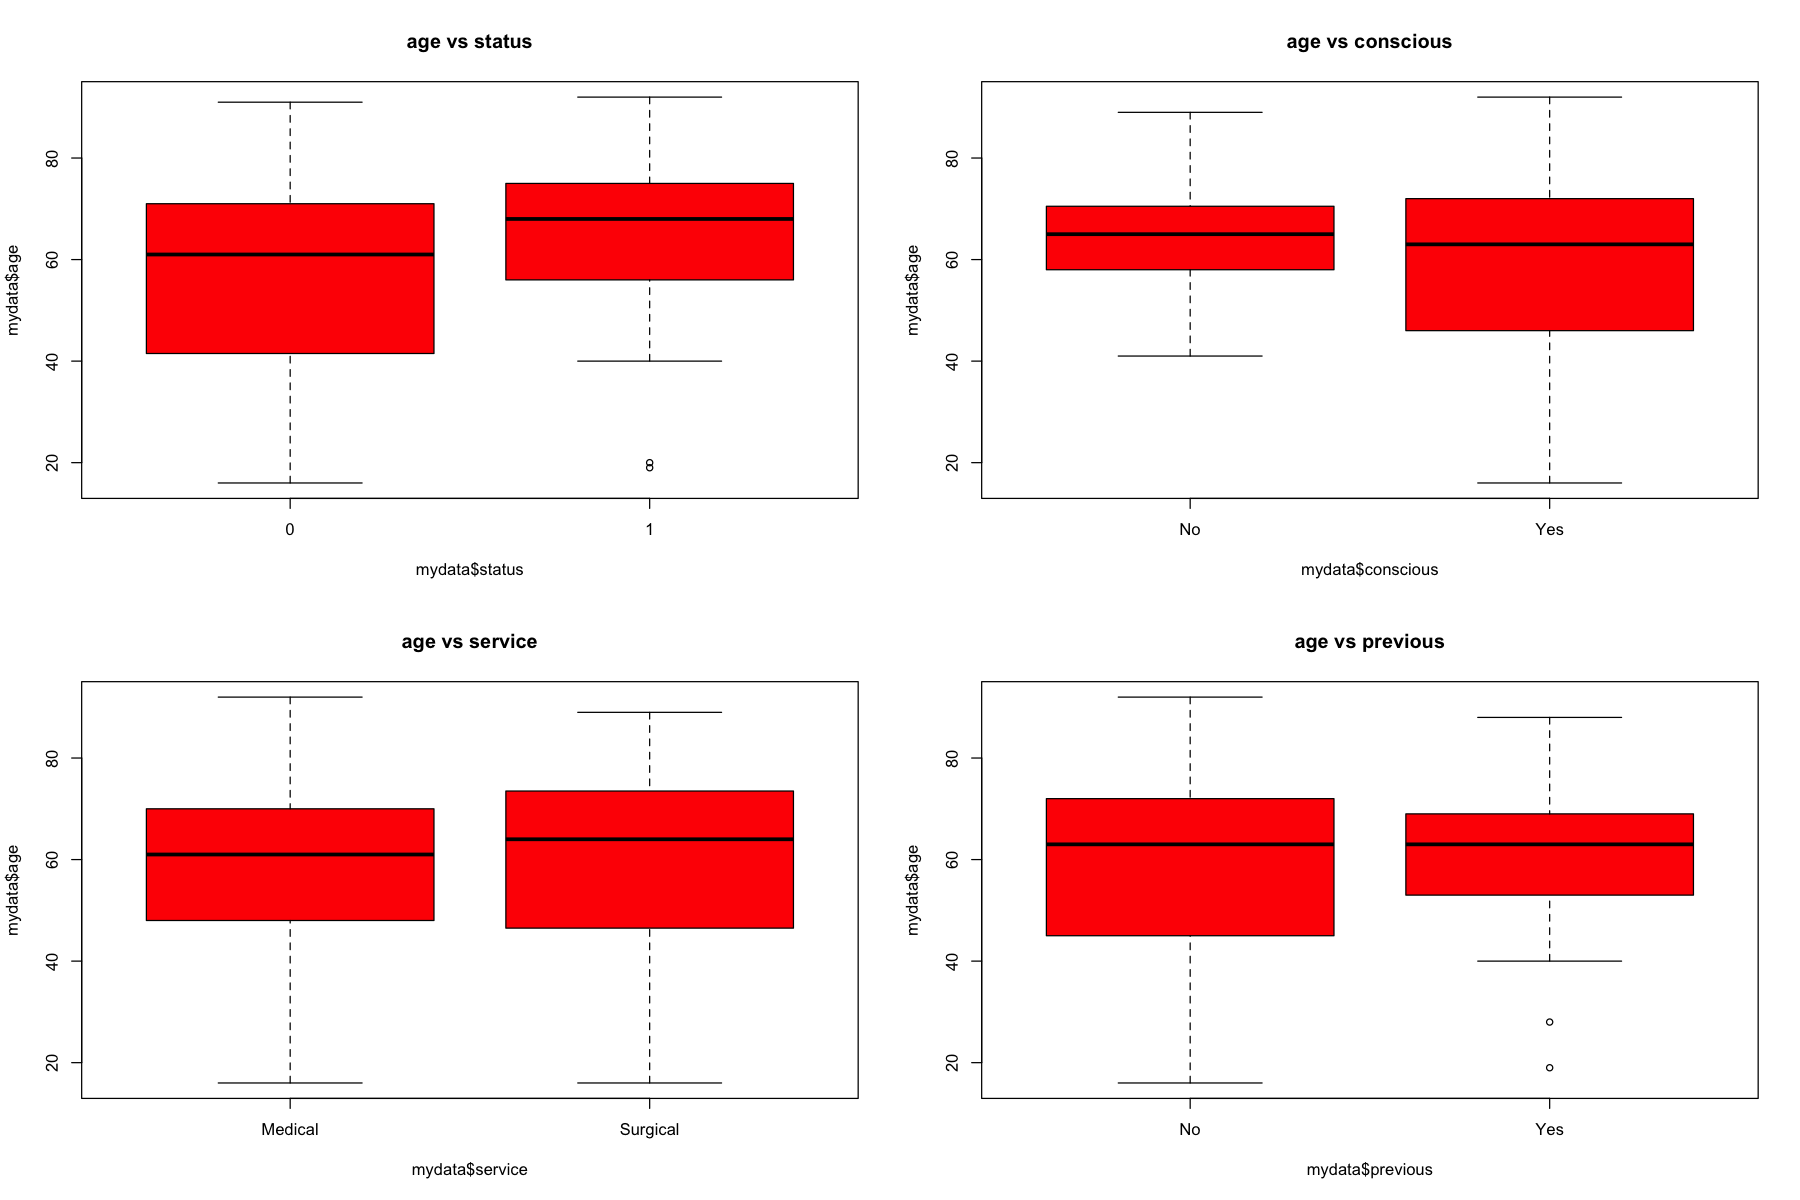

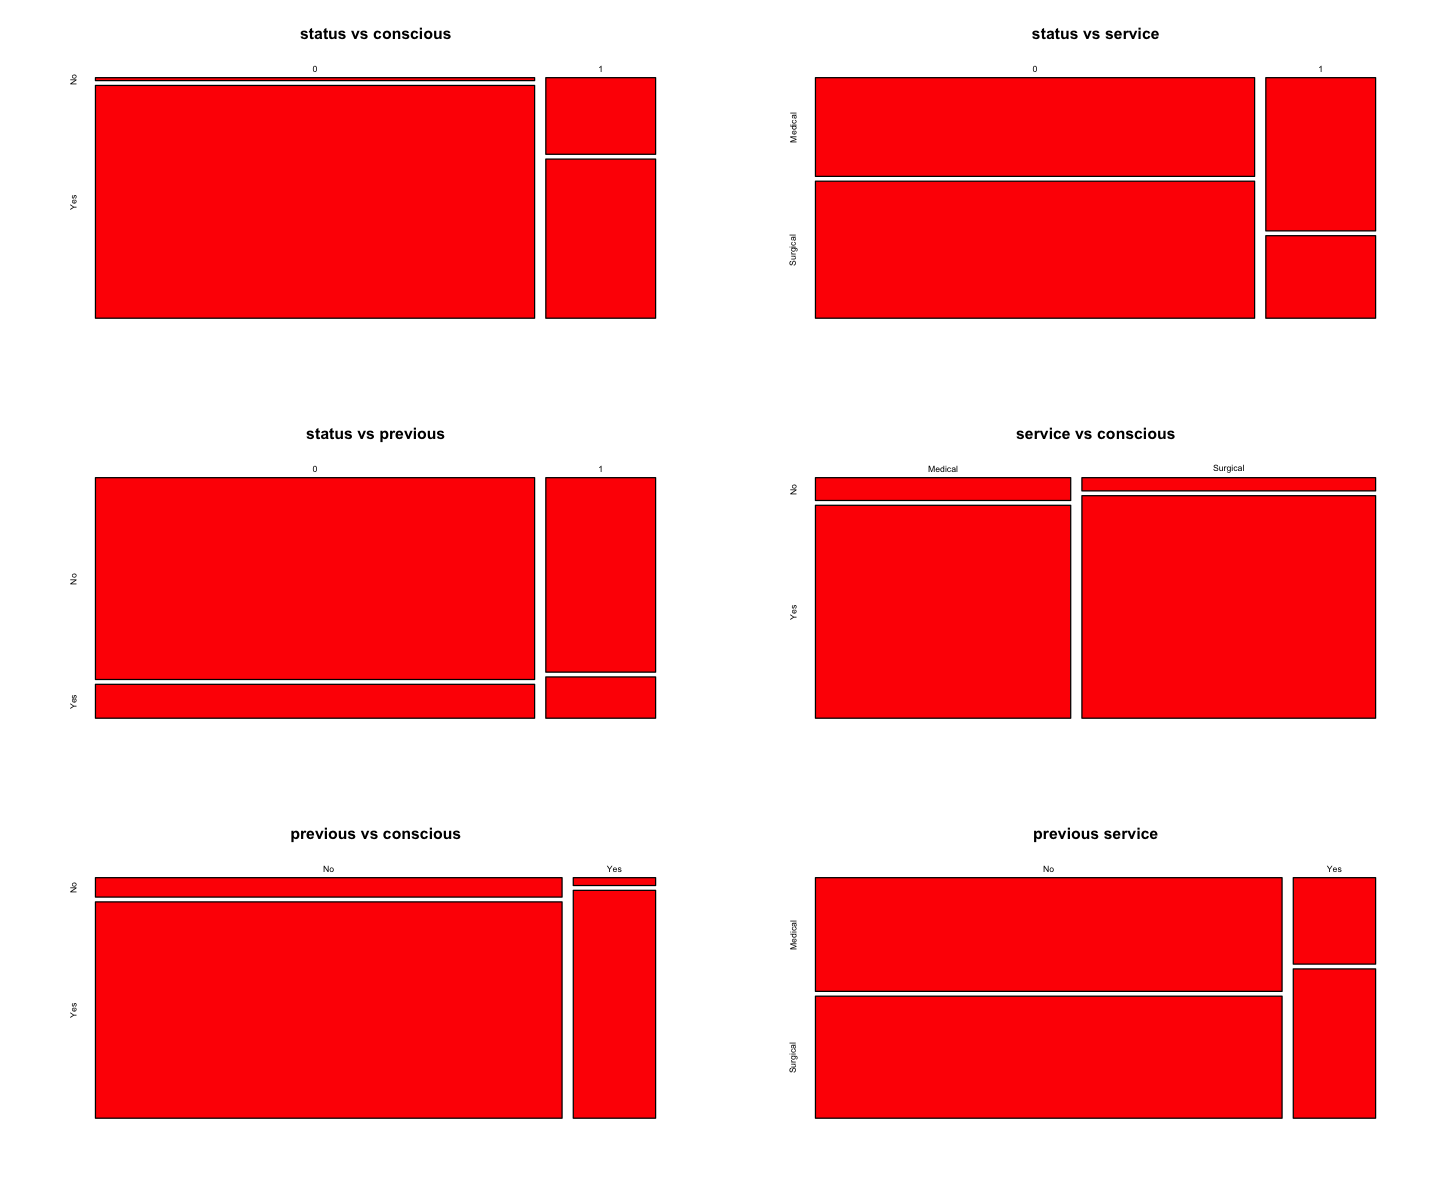

In [266]:
#plot boxplot diverse variabili :

## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 10)



#plot variabile X contro prima variabile dichotomica
 boxplot(mydata$age ~mydata$status, main="age vs status",  col="red")

 boxplot(mydata$age ~mydata$conscious, main="age vs conscious",  col="red")



 boxplot(mydata$age ~mydata$service, main="age vs service",  col="red")

 boxplot(mydata$age ~mydata$previous, main="age vs previous",  col="red")

par(mfrow=c(3,2))


options(repr.plot.width = 12, repr.plot.height = 10)
mosaicplot(table(mydata$status, mydata$conscious), main="status vs conscious",col="red")
mosaicplot(table(mydata$status, mydata$service), main="status vs service",col="red")
mosaicplot(table(mydata$status, mydata$previous), main="status vs previous",col="red")
mosaicplot(table(mydata$service, mydata$conscious), main="service vs conscious",col="red")
mosaicplot(table(mydata$previous, mydata$conscious), main="previous vs conscious",col="red")
mosaicplot(table(mydata$previous, mydata$service), main="previous service",col="red")





In the boxplots we see:

-  first boxplots (from left first row): boxplot for  status=1 has got a  bit higher age (but with smaller whiskers), smaller width and one outlier. Median between two boxplots is similar suggesting that there could be not interactions

-  second boxplots (from left first row): boxplot for  consciouns=No has got a  bit higher age (but with smaller whiskers) and  smaller width. Median between two boxplots is similar suggesting that there could be not interactions

-  third boxplots (from left second row): boxplot for  service=Surgical has got a  bit higher age (but with smaller whiskers) and smaller width. Median between two boxplots is similar suggesting that there could be not interactions

-  fourth boxplots (from left second row): boxplot for  previous=yes has got smaller whiskers , smaller width and two outlier. Median between two boxplots is similar suggesting that there could be not interactions

The boxplots maybe suggest not interactions but we have to check it.

We also see a mosaicplots of qualitative variables.


### LOGISTIC REGRESSION MODEL

Let's start with logistic regression model. We start with a model with all covariates and all interactions, and we and with the following model using model selection. The selection was made based on P-value. There are some covariates for which the p-value is very high (servicesurgical) for example, but for hierarcy principle we cannot remove them. In table there is also the comparison between initial (with all the covariates and interactions) and final model using anova and 'Chisq' test.

In [267]:
# regression fit with all covariates and interactions of them
 model.mydata<- glm( status ~ age*previous+age*service+age*conscious+ service*previous+conscious*previous+conscious*service, data=mydata, family=binomial)

# result of the regression fit
# summary (model.mydata)

model.mydata2 <- update(model.mydata, .~.-previous:service-service:conscious)
 #summary (model.mydata2)

model.mydata3 <- update(model.mydata2, .~.-previous:conscious)
 
#summary (model.mydata3)
model.mydata4 <- update(model.mydata3, .~.-previous:age)
# summary (model.mydata4)

#summary (model.mydata3)
model.mydata5 <- update(model.mydata4, .~.-age:conscious)
 #summary (model.mydata5)

#summary (model.mydata3)
model.mydata6 <- update(model.mydata5, .~.-previous)
 summary (model.mydata6)


Call:
glm(formula = status ~ age + service + conscious + age:service, 
    family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1155  -0.4451  -0.4390  -0.2719   2.3269  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.40070    1.53150  -0.915  0.36040    
age                  0.05975    0.02014   2.966  0.00301 ** 
serviceSurgical      2.65666    1.67134   1.590  0.11194    
consciousYes        -3.62760    0.81176  -4.469 7.87e-06 ***
age:serviceSurgical -0.05842    0.02557  -2.285  0.02231 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 200.16  on 199  degrees of freedom
Residual deviance: 147.70  on 195  degrees of freedom
AIC: 157.7

Number of Fisher Scoring iterations: 5


In [268]:
anova( model.mydata, model.mydata6,test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
189,142.5245,NA,NA,NA
195,147.6956,-6,-5.171043,0.5220704


Let's try with smooth splines for age in order to see if something improves. I set the seed at 111.

In [269]:
set.seed(111)
library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
x1.cv = smooth.spline(x= mydata$age, y=mydata$status, cv=TRUE)
#x1.cv 



## primo fit considerando le variabili splines smooth
m.gam <- gam(status ~ s(age,2) + service + conscious + s(age,2):service,family="binomial",
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)


Call: gam(formula = status ~ s(age, 2) + service + conscious + s(age, 
    2):service, family = "binomial", data = mydata)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-2.1066 -0.4628 -0.4329 -0.2888  2.2950 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 200.161 on 199 degrees of freedom
Residual Deviance: 147.3728 on 193.9999 degrees of freedom
AIC: 159.3729 

Number of Local Scoring Iterations: 6 

Anova for Parametric Effects
                   Df  Sum Sq Mean Sq F value    Pr(>F)    
s(age, 2)           1   5.869  5.8691  6.0156   0.01506 *  
service             1   3.700  3.6997  3.7920   0.05294 .  
conscious           1  19.069 19.0686 19.5447 1.634e-05 ***
s(age, 2):service   1   4.972  4.9724  5.0965   0.02509 *  
Residuals         194 189.275  0.9756                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
                  Npar Df Npar Chisq P(Chi)
(Intercept)   

From smooth splines outputs it is clear that we don't need them.
In fact Based  AIC for model without splines is lower.
We can see it also from training error rate that is equal to 14% which is good.

- training error rate is: 28/200
- sensitivity is: 16/40
- specitivity is: 156/160

In [270]:
#estimate values
est.values<-predict(model.mydata6)
#est.values

#estimate probability
est.probs<-predict(model.mydata6,type="response")
#est.probs

preds<-rep(0,nrow(mydata))
preds[est.probs>0.5]<-1
addmargins(table(preds,taking=mydata$status))

,0,1,Sum
0,156,24,180
1,4,16,20
Sum,160,40,200


Let's now select a training set consider 60% of data and test set with 40% and evaluate the model we obtained. The seed is set to 222.

In [271]:
n<-nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)


#training and test

training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]

## fit the model with the training set

model.mydata.train <- glm(status ~ age + service + conscious + age:service, data=training.set, family="binomial")
summary(model.mydata.train)


Call:
glm(formula = status ~ age + service + conscious + age:service, 
    family = "binomial", data = training.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0178  -0.5256  -0.4082  -0.2565   2.3341  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.72225    1.85140  -0.930 0.352247    
age                  0.06132    0.02456   2.497 0.012518 *  
serviceSurgical      3.23481    2.01099   1.609 0.107711    
consciousYes        -3.19356    0.89379  -3.573 0.000353 ***
age:serviceSurgical -0.07253    0.03114  -2.330 0.019830 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 125.44  on 119  degrees of freedom
Residual deviance:  92.86  on 115  degrees of freedom
AIC: 102.86

Number of Fisher Scoring iterations: 5


Let's check the test error rate, sensitivity and specitivity.

In [272]:
### prediction based on test set

probs.test <- predict(model.mydata.train, newdata=test.set, type='response')
preds.test <- rep(0, length(probs.test))
preds.test[probs.test>0.5] <- 1
addmargins(table(preds.test, status=test.set$status))

,0,1,Sum
0,65,8,73
1,1,6,7
Sum,66,14,80


- test error rate is: 9/80
- sensitivity is: 6/14
- specitivity is: 65/66

So usign best model obtain in the total dataset and evaluate it in a training set and test set, leads to an error on the test set equal too  11.25%, which is satisfactory.

Let's have a look into ROC curve in order to understand the goodness of our classifier.
We can see that the AUC value is 0.759
We know that as much closer AUC is to 1 much the model is good, so in this case is satisfactory.

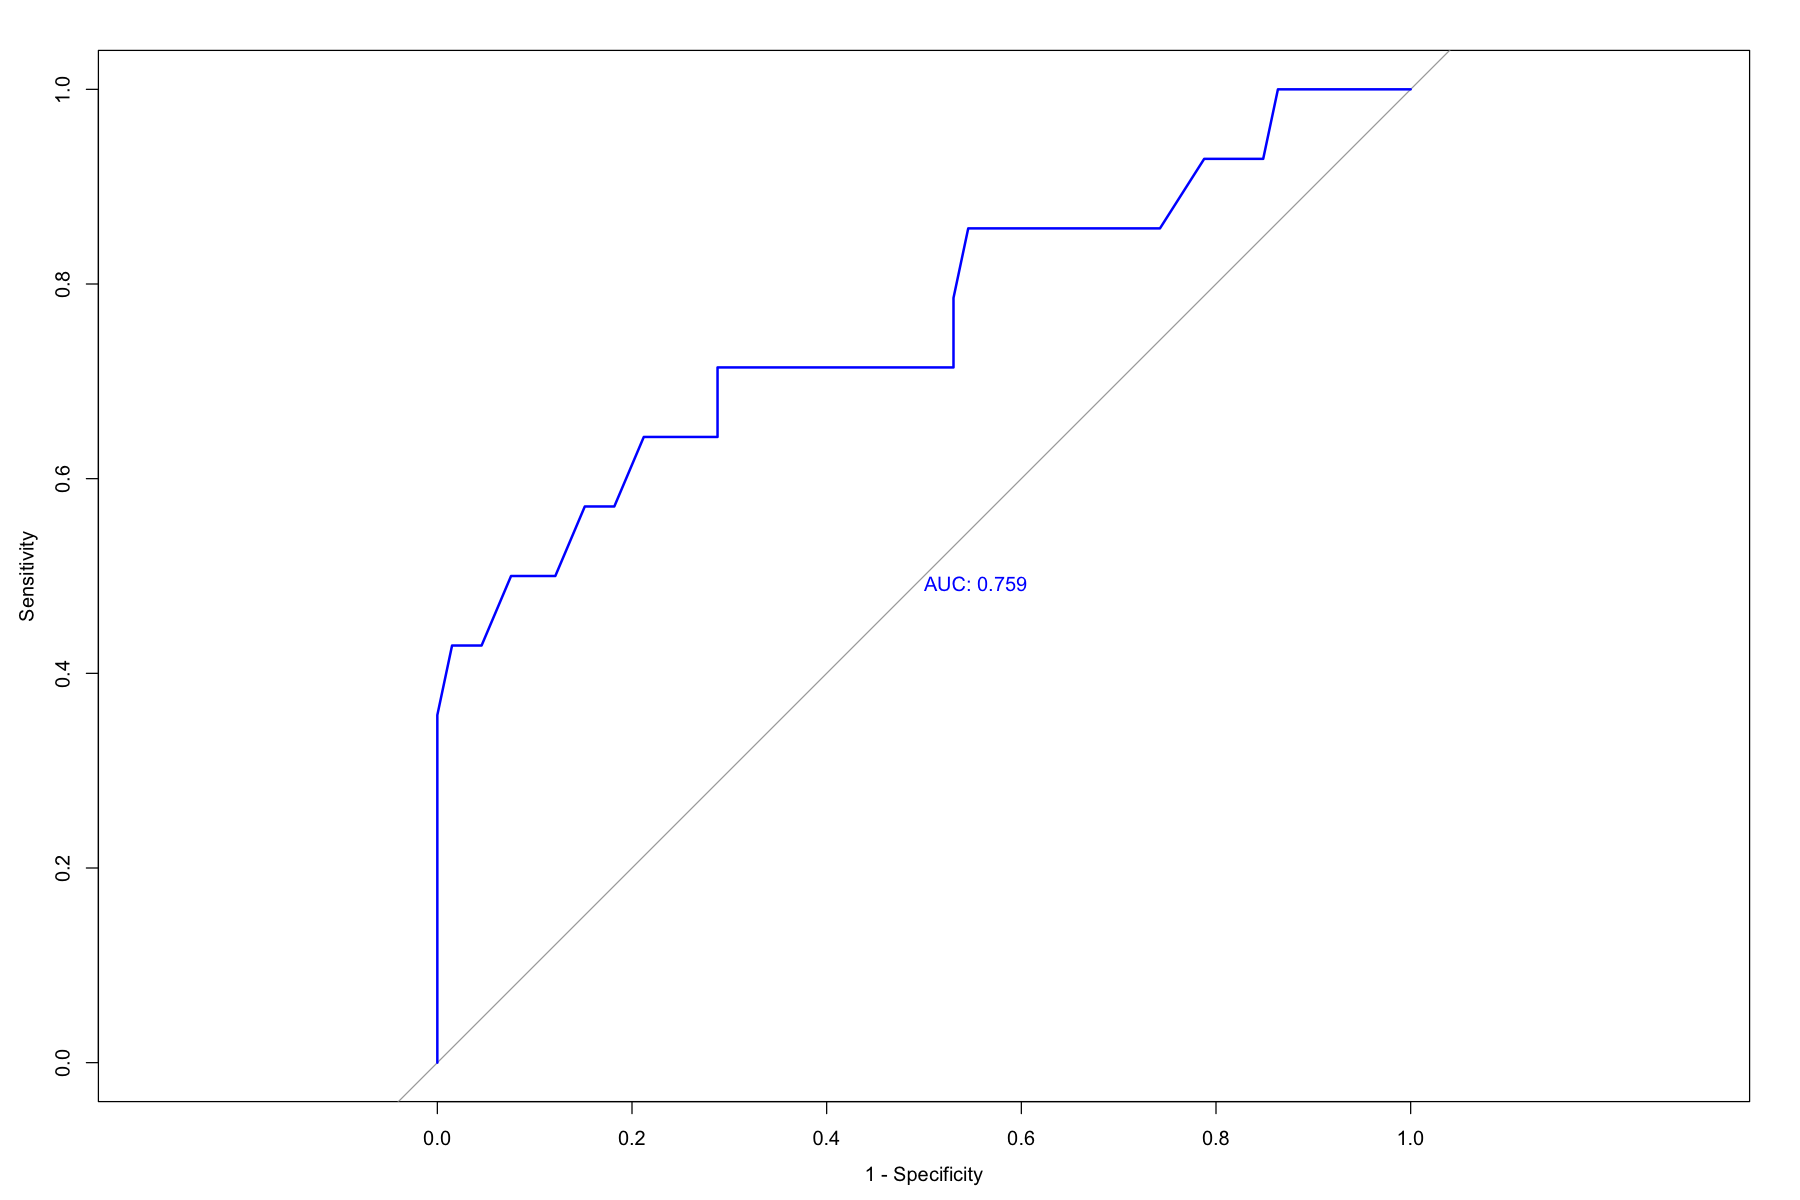

In [275]:
library(pROC)
values.roc1 <- roc(test.set$status, probs.test )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE,col="blue")


### LDA

Let's now perform LDA in the same training set obtained before considering the model obtained with logistic regression.

Call:
lda(status ~ age + service + conscious + age:service, data = training.set)

Prior probabilities of groups:
        0         1 
0.7833333 0.2166667 

Group means:
       age serviceSurgical consciousYes age:serviceSurgical
0 56.43617       0.6063830    0.9787234            35.47872
1 64.73077       0.3461538    0.6923077            19.30769

Coefficients of linear discriminants:
                            LD1
age                  0.04581725
serviceSurgical      2.10359740
consciousYes        -3.12240485
age:serviceSurgical -0.05131245

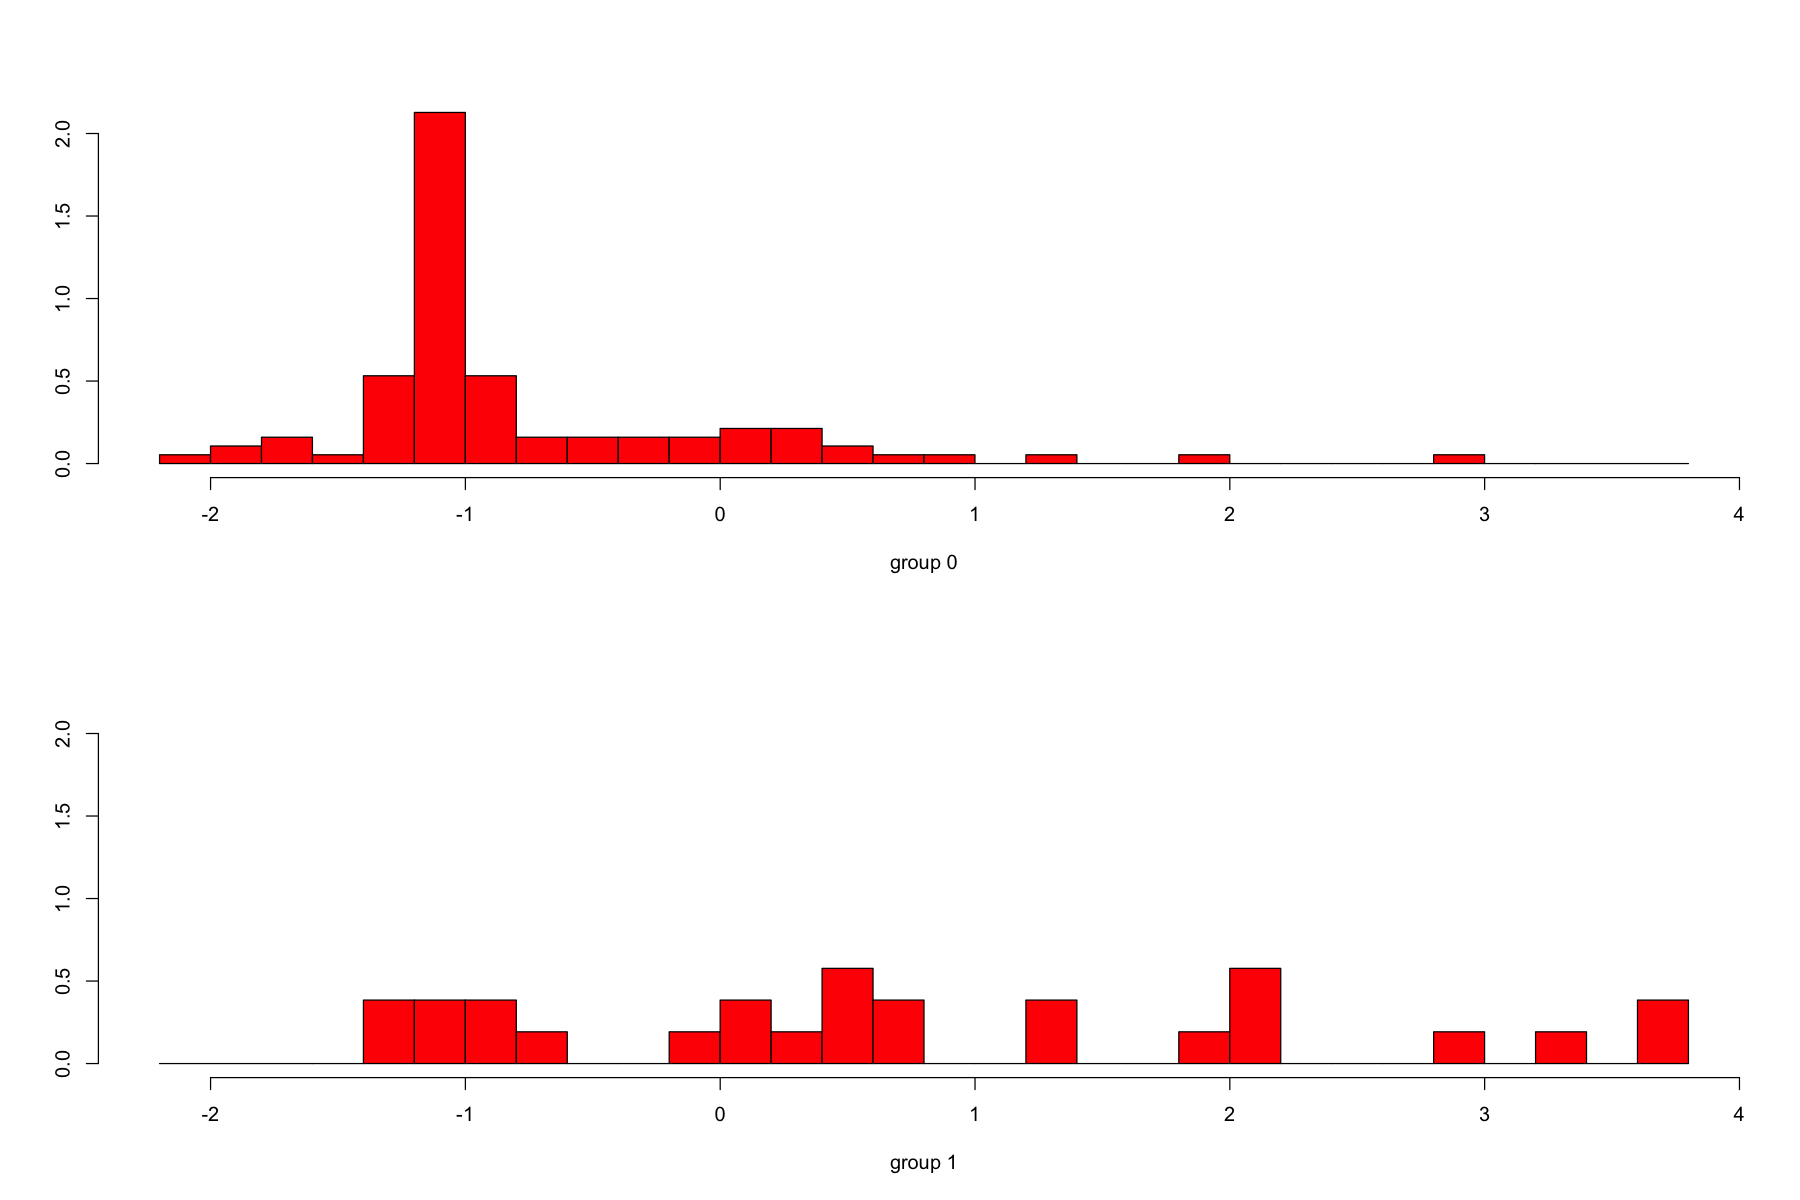

In [254]:
## upload the library
library(MASS)
n <- nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)
training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]
model.mydata.lda <- lda(status ~ age + service + conscious + age:service, data=training.set)
model.mydata.lda
plot(model.mydata.lda,col="red")
par(mfrow=c(1,1))

If the discriminant function is a good function we can separate very good the two histograms otherwise not. In the case above we see a partially overleapping meaning that the discriminant function is not so good. This could also happen because the observations are few and splitting the data set into 2 samples could be
bad for the analysis.
The confusion matrix is:

In [255]:
preds.lda <- predict(model.mydata.lda, test.set)
preds.lda1 <- rep(0, nrow(test.set))
preds.lda1[preds.lda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.lda1, status=test.set$status))

,0,1,Sum
0,65,8,73
1,1,6,7
Sum,66,14,80


- test error rate is: 8/14
- sensitivity is: 65/66
- specitivity is: 1

So usign  model with lda (with interaction obtained in the previous logistic model) and evaluate it in a training set and test set, leads to an error on the test set equal too  11.25%, which is satisfactory.

The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.

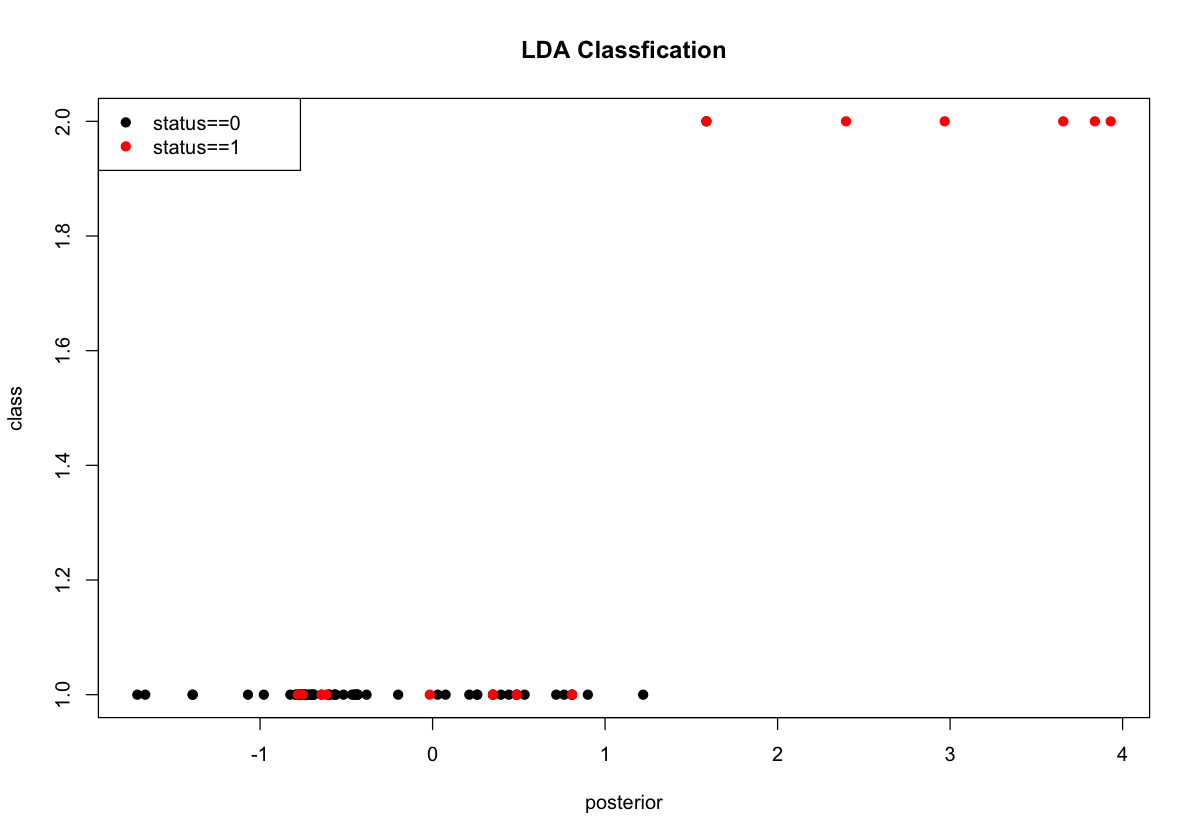

In [256]:
options(repr.plot.width = 10, repr.plot.height = 7)
par(mfrow=c(1,1))
plot(preds.lda$x[,1], preds.lda$class, col=test.set$status,xlab="posterior",ylab="class",pch=19,main="LDA Classfication")
legend("topleft", col=c(1,2), pch=c(19,19),
        legend=c('status==0','status==1'))



Let's now consider the ROC curve for in order to understand how good is our classifier. 
We can see that the AUC value is 0.754
we know that as much closer AUC is to 1 much the model is good, so in this case is not so bad but we would rather have an higher value.
It is also smaller ( even if they are pretty similar) then the one obtained with Logistic Regression, so we can say that logistic regression is better in this case.


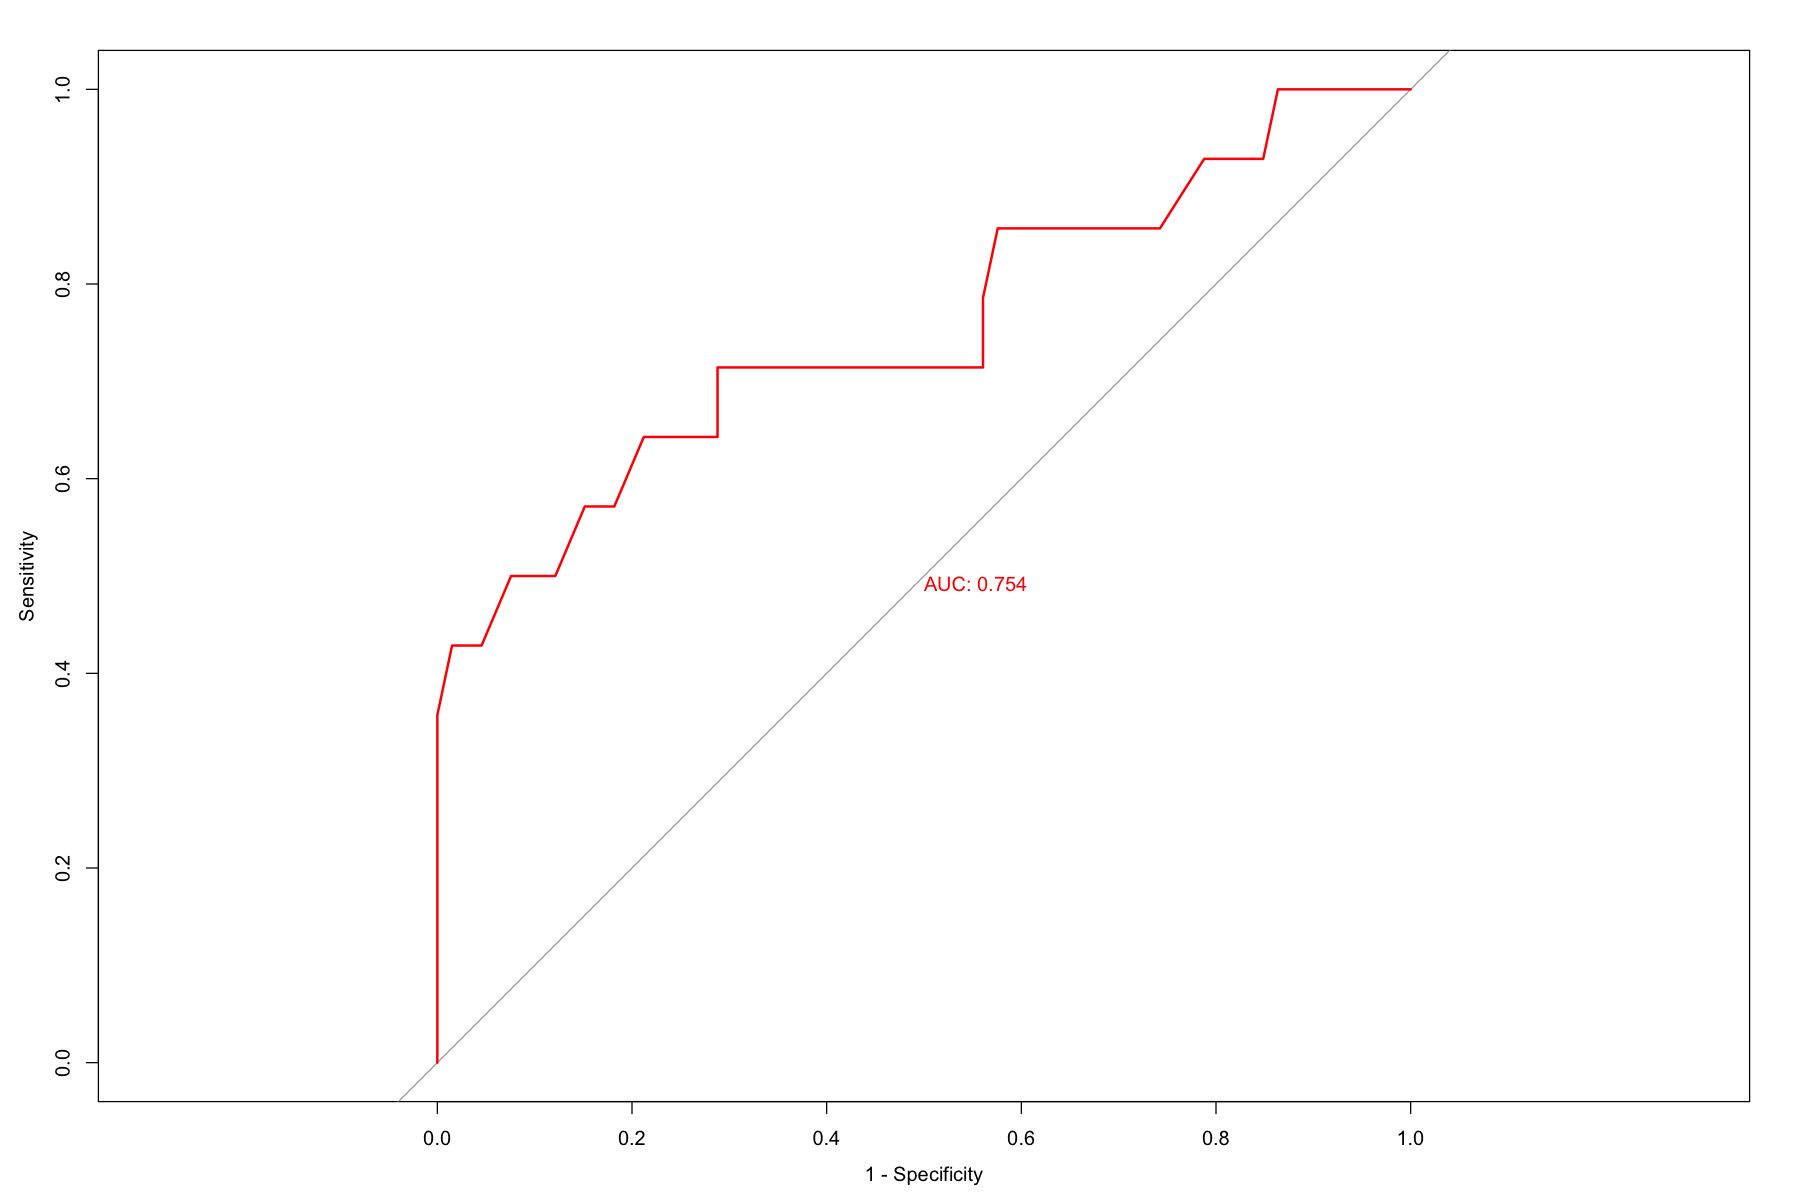

In [257]:
## ROC curve
library(pROC)

values.roc2 <- roc(test.set$status, preds.lda$posterior[,2] )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=TRUE, auc.polygon=FALSE,col="red")
#plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon.col=TRUE)

# COMMENTARE

### QDA

Let's perform QDA with the same consideration of LDA.

In [258]:
model.mydata.qda <- qda(status ~ age + service + conscious + age:service, data=training.set)
model.mydata.qda

# prediction and missclassification table
preds.qda <- predict(model.mydata.qda, test.set)
#preds.qda


preds.qda1 <- rep(0, nrow(test.set))
preds.qda1[preds.qda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.qda1, status=test.set$status))

Call:
qda(status ~ age + service + conscious + age:service, data = training.set)

Prior probabilities of groups:
        0         1 
0.7833333 0.2166667 

Group means:
       age serviceSurgical consciousYes age:serviceSurgical
0 56.43617       0.6063830    0.9787234            35.47872
1 64.73077       0.3461538    0.6923077            19.30769

,0,1,Sum
0,64,8,72
1,2,6,8
Sum,66,14,80


- test error rate is: 10/80  
- sensitivity is: 6/14
- specitivity is:64/65



The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.

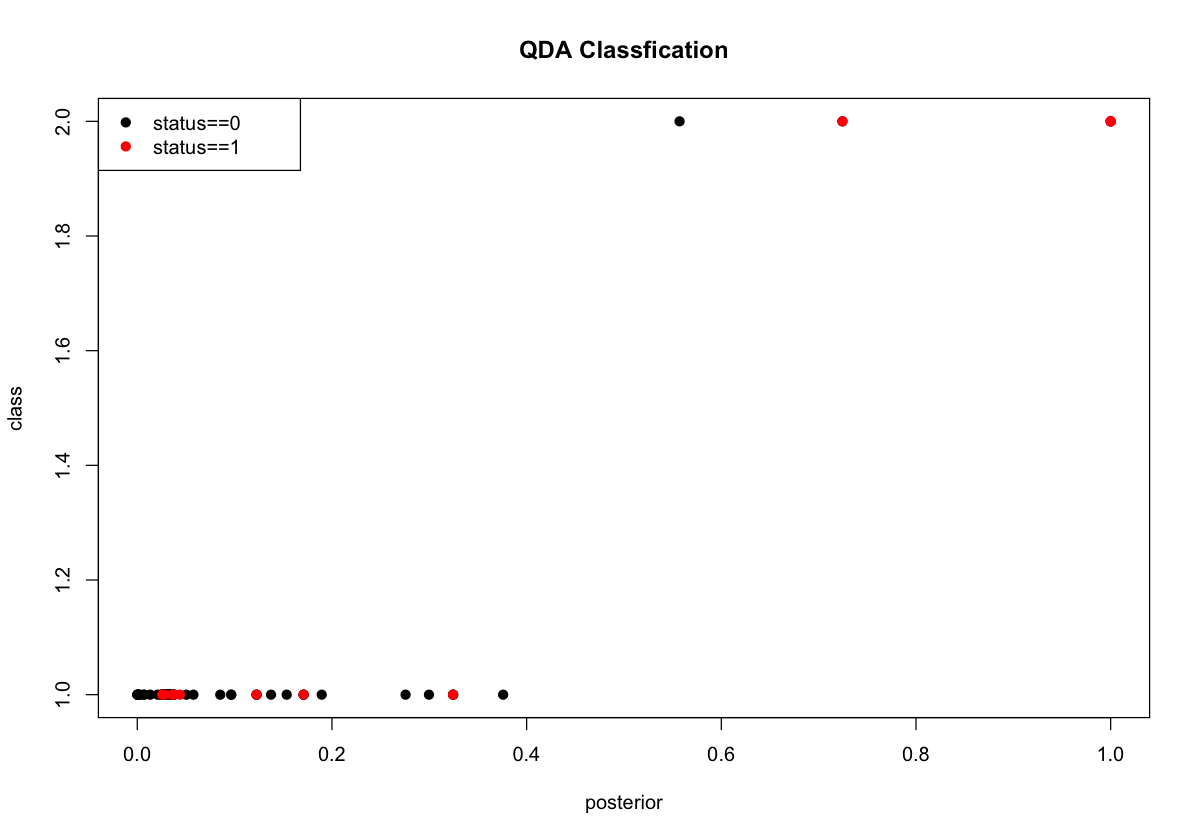

In [259]:
options(repr.plot.width = 10, repr.plot.height = 7)
par(mfrow=c(1,1))
plot(preds.qda$posterior[,2], preds.qda$class,xlab="posterior",ylab="class", col=test.set$status,pch=19,main="QDA Classfication")
legend("topleft", col=c(1,2), pch=c(19,19),
        legend=c('status==0','status==1'))



Let's now consider the ROC curve for in order to understand how good is our classifier. 
We can see that the AUC value is 0.792

we know that as much closer AUC is to 1 much the model is good, so in this case is not so bad but we would rather have an higher value.
It is also higher  then the one obtained with Logistic Regression and  to one obained with LDA.

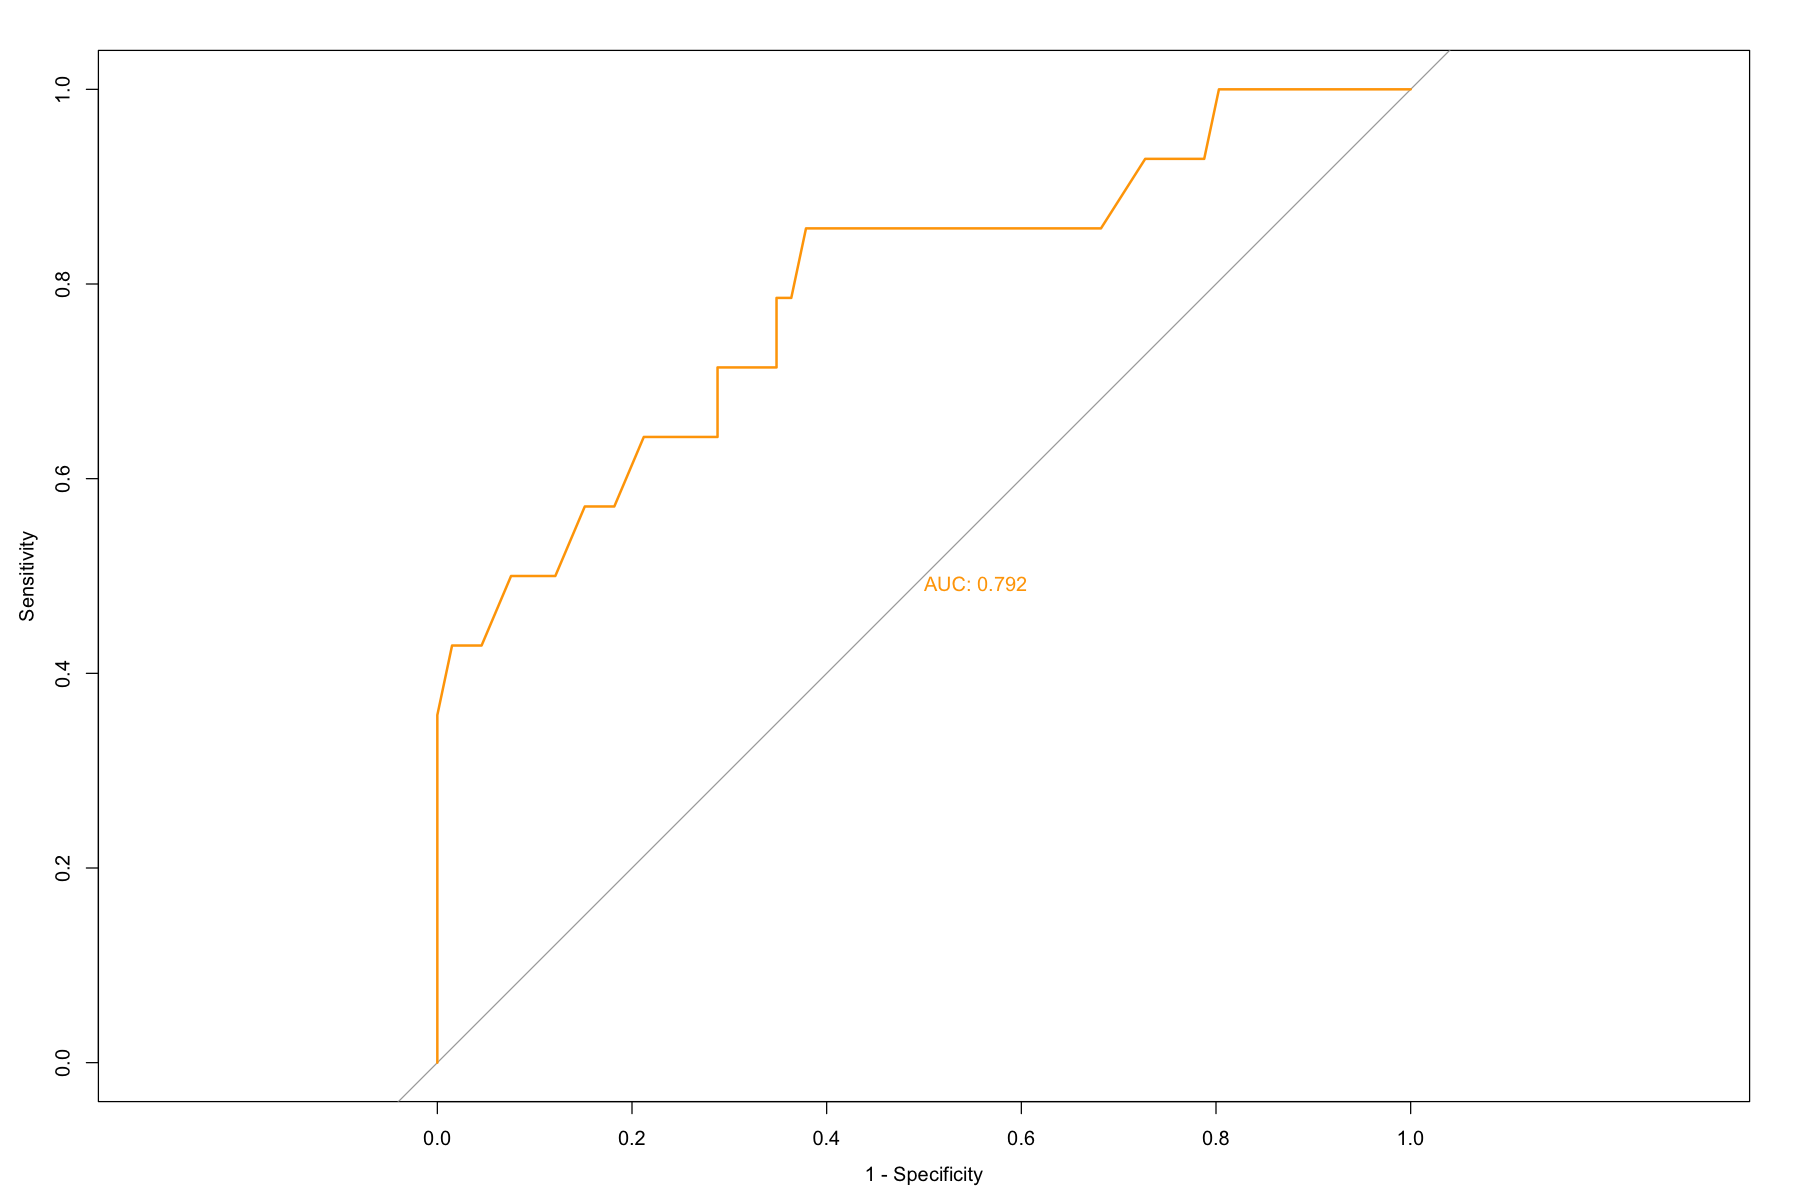

In [264]:
values.roc3 <- roc(test.set$status, preds.qda$posterior[,2] )
options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE, col="orange")


### CONCLUSION POINT 1

Based on ROC curve (plot below) we see that the best classifier is the one obtained with the QDA (Highest AUC), by the way since the difference is very small (~3%) with logistic regression's AUC we can say that the performances are quite 
similar between the two classifiers so we prefer using logistic regression classifier since it is simpler than QDA's one.

Furthermore, we see that:

- age affects positively the odds of being a death.

- serviceSurgical (even if from p-value is not significant but we keep it as hierarcy principle suggests)affects positively the odds of being death  wrt to baseline serviceMedical.

- conscious:YES affects negatively the odds of being death  wrt to baseline  conscious:No.

- age:serviceSurgical (the interaction) affects negatively the odds of being death.

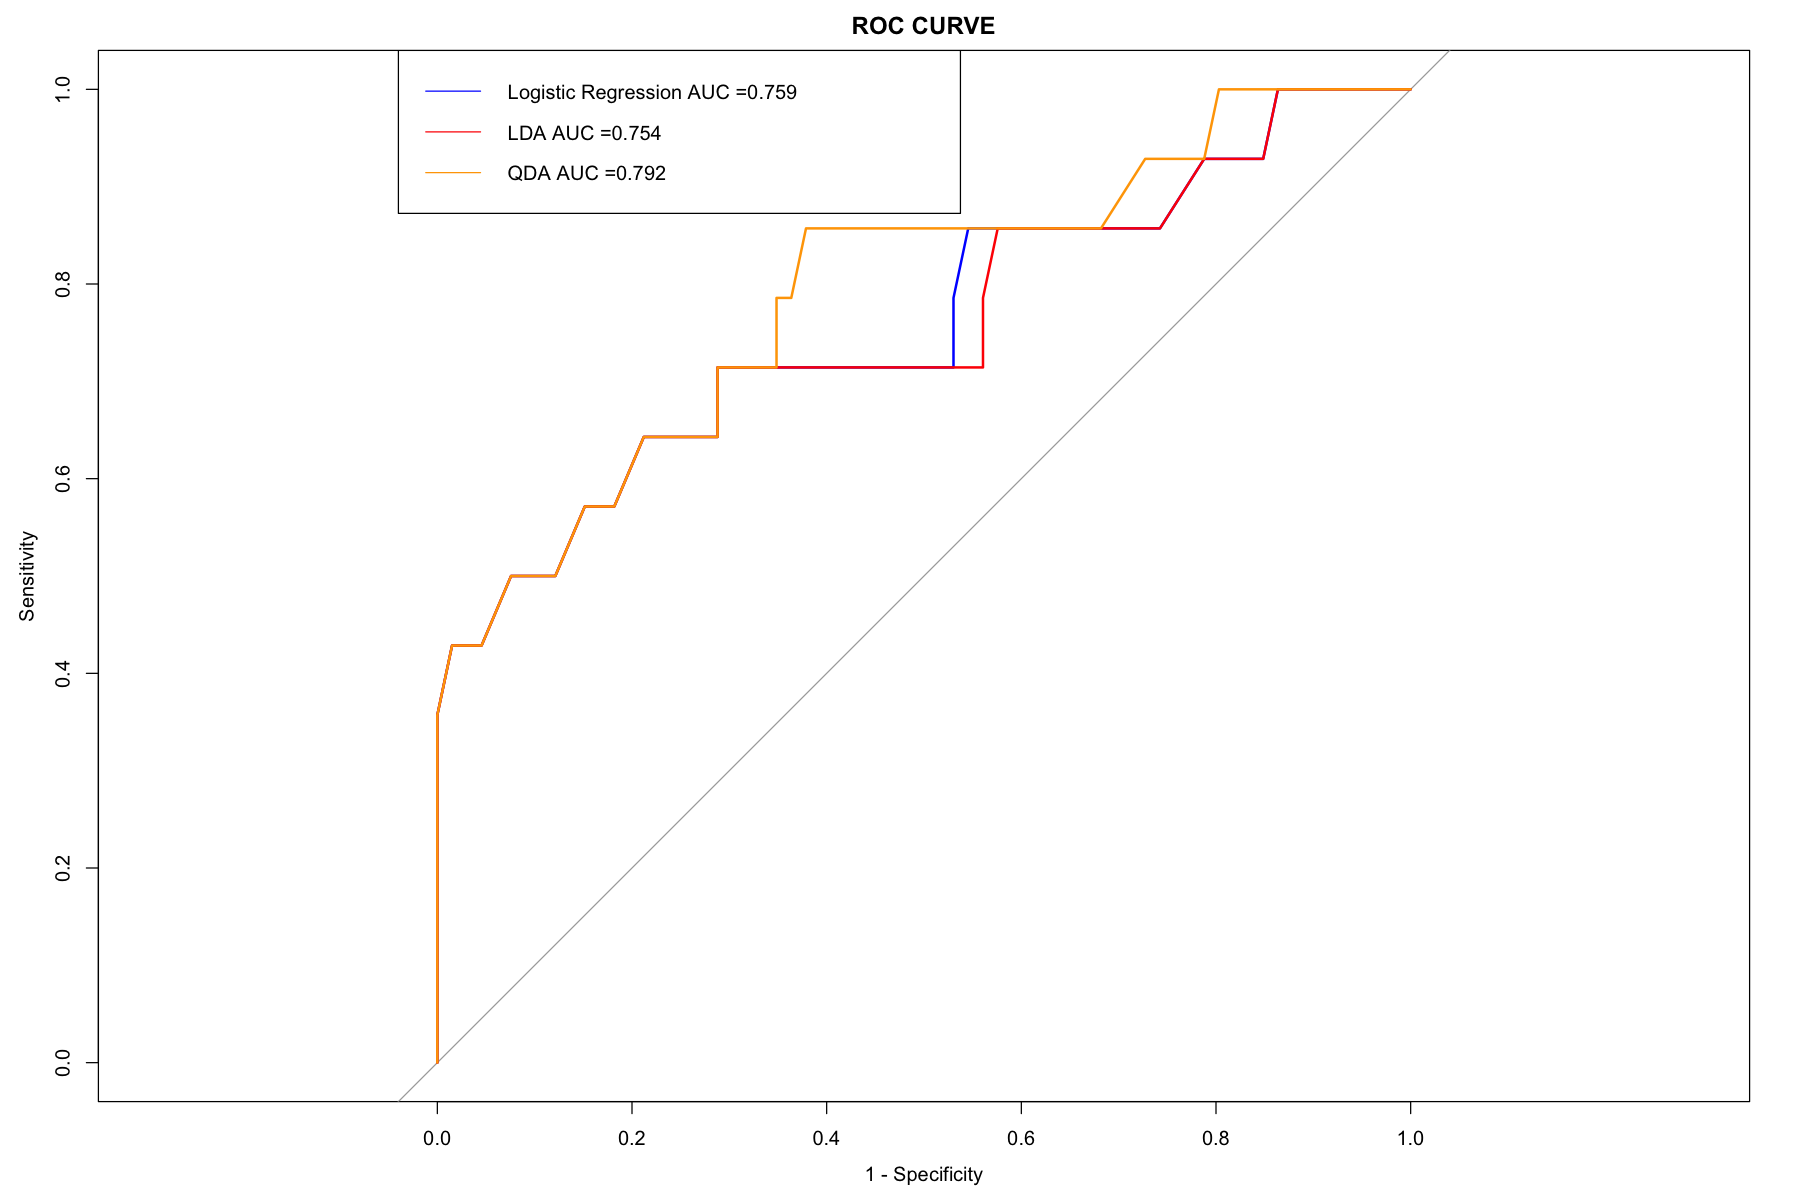

In [278]:
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=FALSE, auc.polygon=FALSE,col="blue",main="ROC CURVE")
lines(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=FALSE, auc.polygon=FALSE,col="red",add=TRUE)
lines(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0),lty=1,print.auc=FALSE, auc.polygon=FALSE,col="orange",add=TRUE)
legend("topleft",legend=c(paste0("Logistic Regression AUC =",0.759),paste0("LDA AUC =",0.754),paste0("QDA AUC =",0.792)),lty=c(1,1,1),col=c("blue","red","orange"))



### RIDGE
Let's try with Ridge regression with all variables including the interactions obtained in the previous case.
The complete dataset is (first 3 rows):

In [318]:
 load("icua.RData")
ls()
names(icua)
 mydata<-icua
dim(mydata)
mydata[1:3,]

mydata$status<-as.factor(mydata$status)


[1] "X"                  "best.lambda"        "cv.lasso"          
 [4] "cv.ridge"           "data"               "est.probs"         
 [7] "est.values"         "icua"               "id.zero"           
[10] "m.gam"              "m.lasso"            "m.lasso.min"       
[13] "m.pcr"              "m.ridge"            "m.ridge.min"       
[16] "model.mydata"       "model.mydata.lda"   "model.mydata.qda"  
[19] "model.mydata.train" "model.mydata2"      "model.mydata3"     
[22] "model.mydata4"      "model.mydata5"      "model.mydata6"     
[25] "mse"                "mydata"             "n"                 
[28] "nonzero"            "pcr.pred"           "preds"             
[31] "preds.lda"          "preds.lda1"         "preds.qda"         
[34] "preds.qda1"         "preds.test"         "probs.test"        
[37] "selection"          "sum"                "test.set"          
[40] "training.set"       "values.roc1"        "values.roc2"       
[43] "values.roc3"        "x1.cv"              "x2"                
[46] "y"                  "y2"

[1] "sex"            "race"           "service"        "cancer"        
 [5] "renal"          "infection"      "cpr"            "previous"      
 [9] "pO2low"         "pHlow"          "pCO2hi"         "bicarbonateLow"
[13] "creatinineHi"   "status"         "age"            "conscious"

[1] 200  16

sex,race,service,cancer,renal,infection,cpr,previous,pO2low,pHlow,pCO2hi,bicarbonateLow,creatinineHi,status,age,conscious
Female,White,Medical,No,No,Yes,No,No,No,No,No,No,No,0,27,Yes
Male,White,Medical,No,No,No,No,Yes,No,No,No,No,No,0,59,Yes
Male,White,Surgical,No,No,No,No,No,No,No,No,No,No,0,77,Yes


In [280]:
library(glmnet)
y <-  mydata$status
X <- model.matrix(status ~ . +age:service  , data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0,family='binomial')

Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  18  over the graph indicate the number of covariates entering the model as  $ \lambda$ varies: 17 is repeated, as ridge regression is not a selection method.

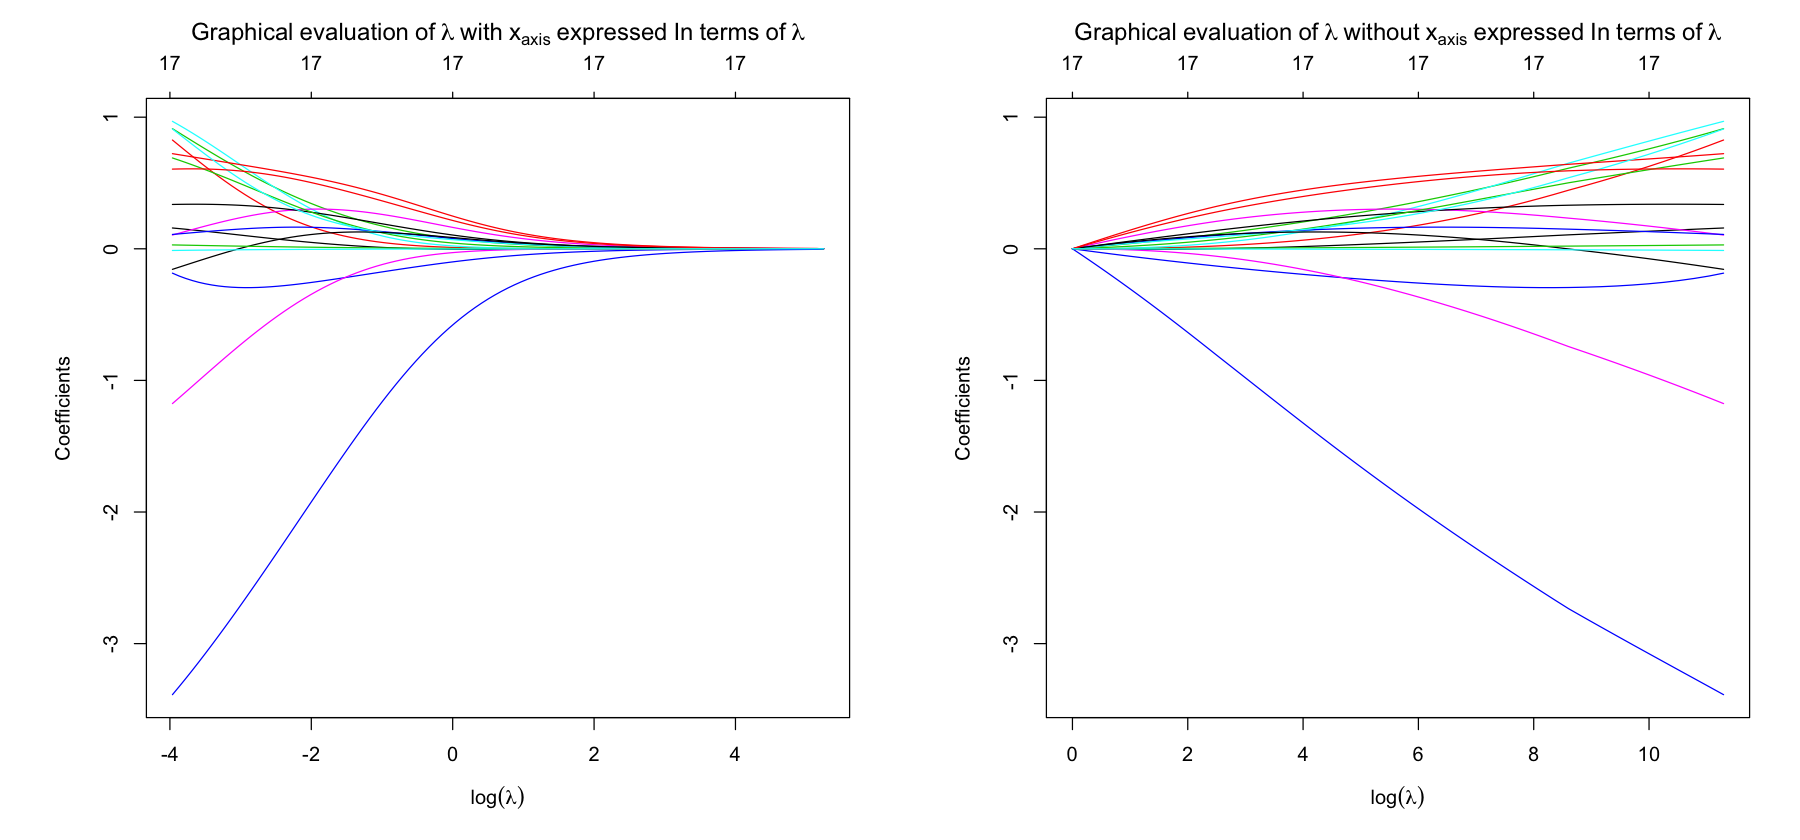

In [281]:
## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.04 \
And the MSE is:0.82

[1] 0.04385356

[1] 0.8197749

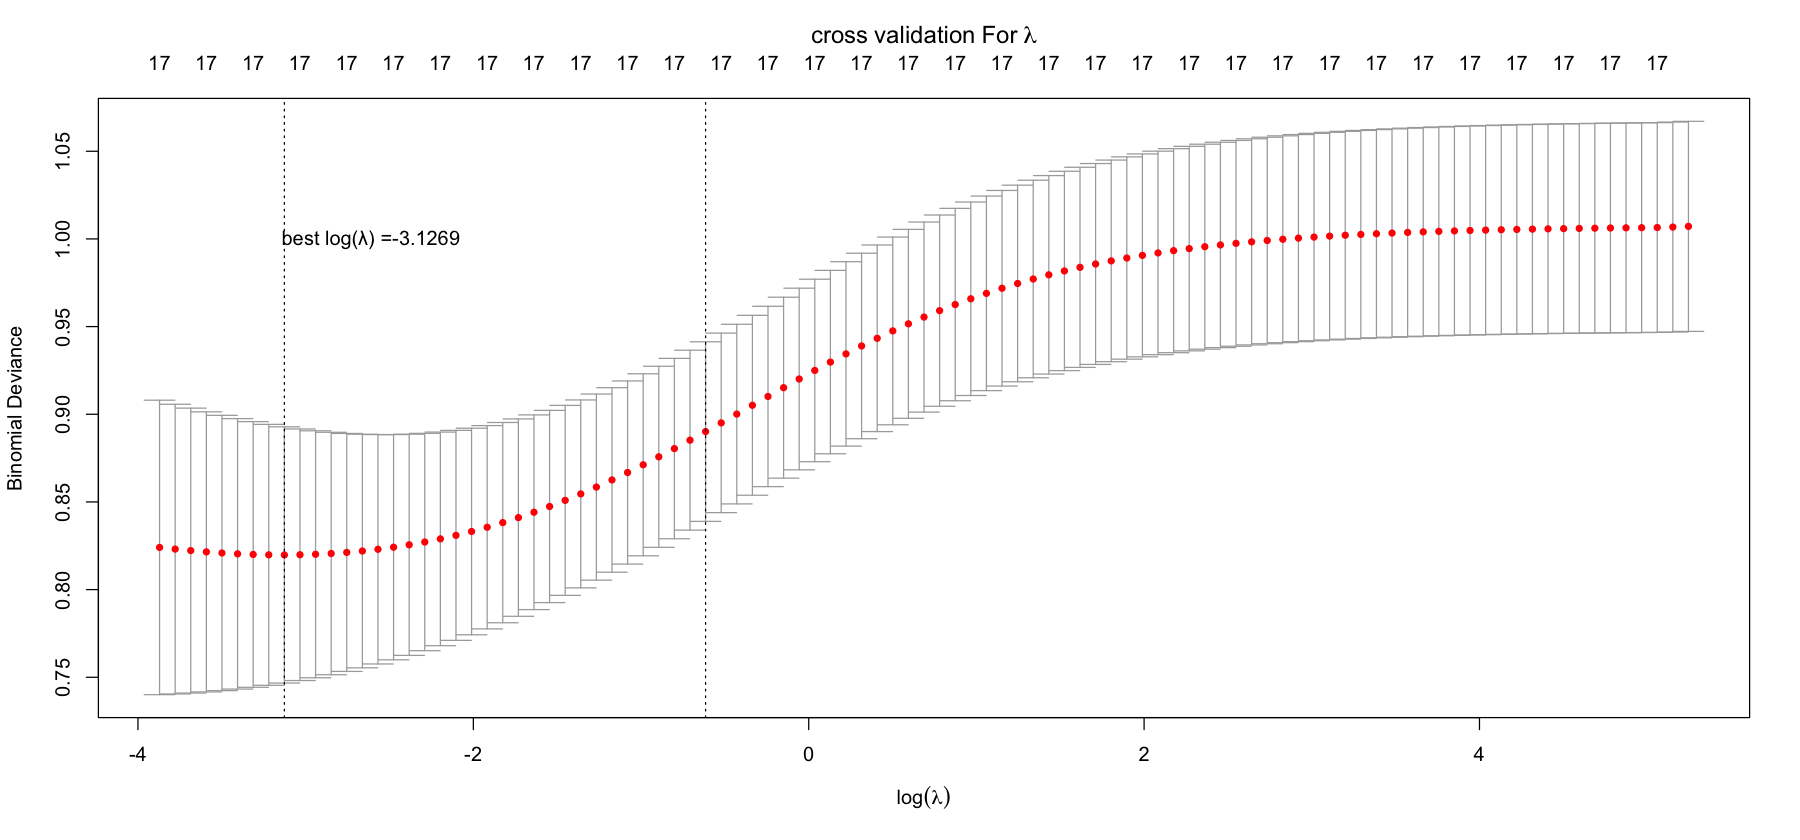

In [282]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0,family='binomial')
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=1, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.31


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 0, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,] 17 0.2877 0.04385

18 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)         -0.86399549
sexMale              0.11149041
raceOther            0.47902493
raceWhite            0.64068039
serviceSurgical     -0.29171327
cancerYes            0.68469650
renalYes             0.22198842
infectionYes         0.33336124
cprYes               0.65029755
previousYes          0.52190241
pO2lowYes            0.14579563
pHlowYes             0.57363778
pCO2hiYes           -0.78463806
bicarbonateLowYes   -0.01523070
creatinineHiYes      0.59662131
age                  0.02125123
consciousYes        -2.80442115
serviceSurgical:age -0.00799419

[1] 0.3094908

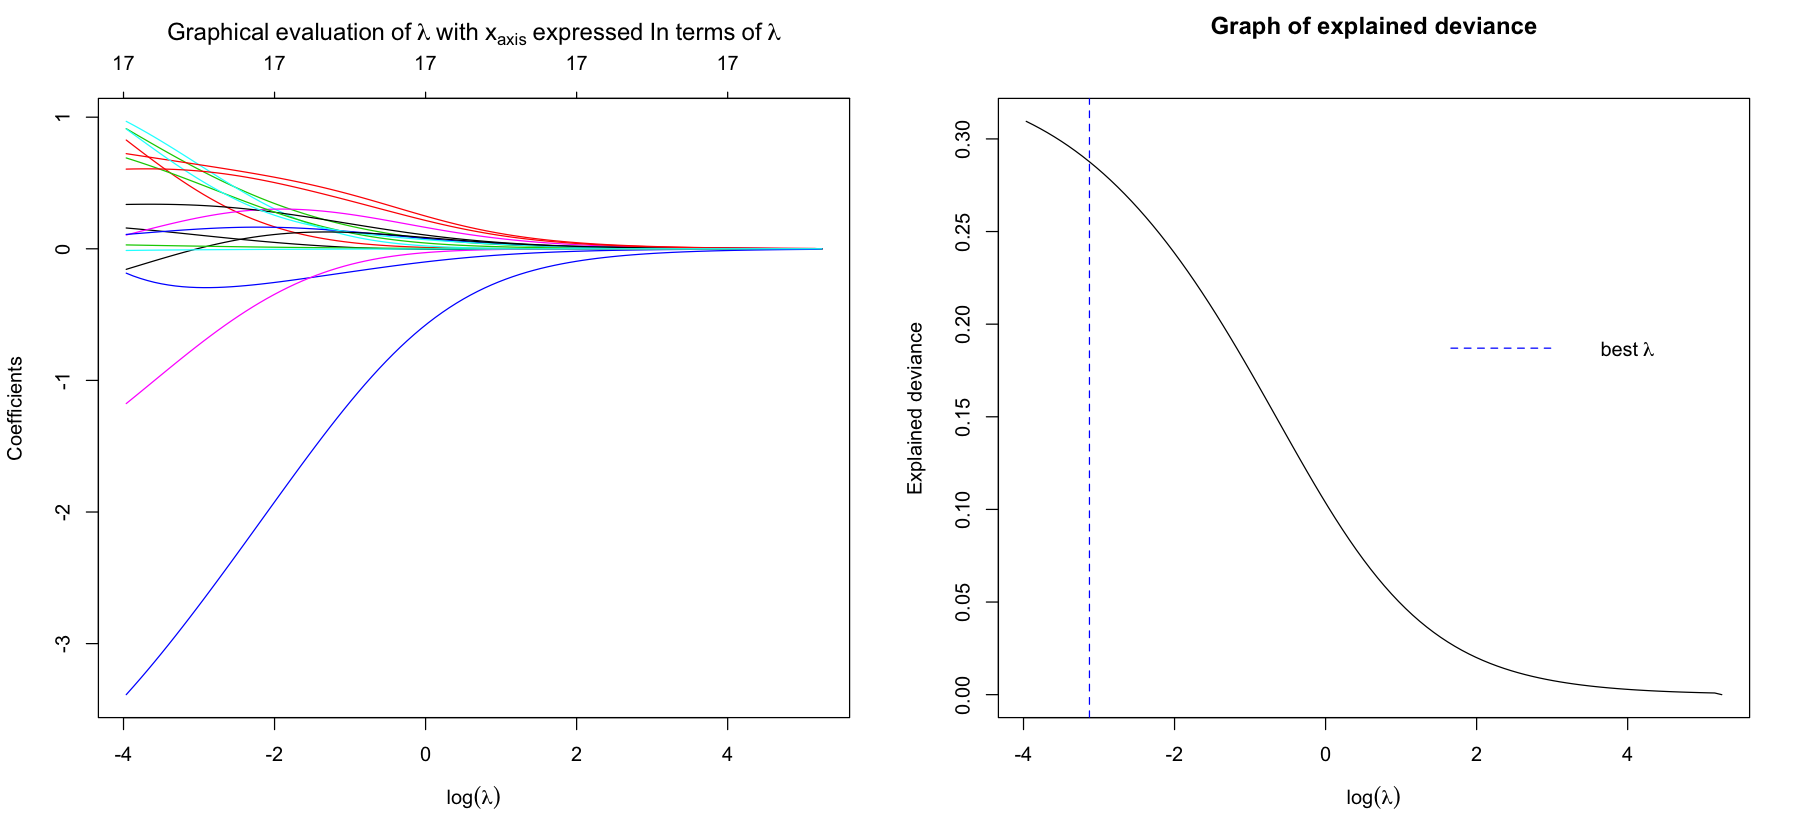

In [283]:
#### best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda,family='binomial')
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 1,bty="n", y=0.2)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO
Let's perform the analysis usign lasso.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that 15 over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:18 is not repeated, as lasso regression is a selection method.

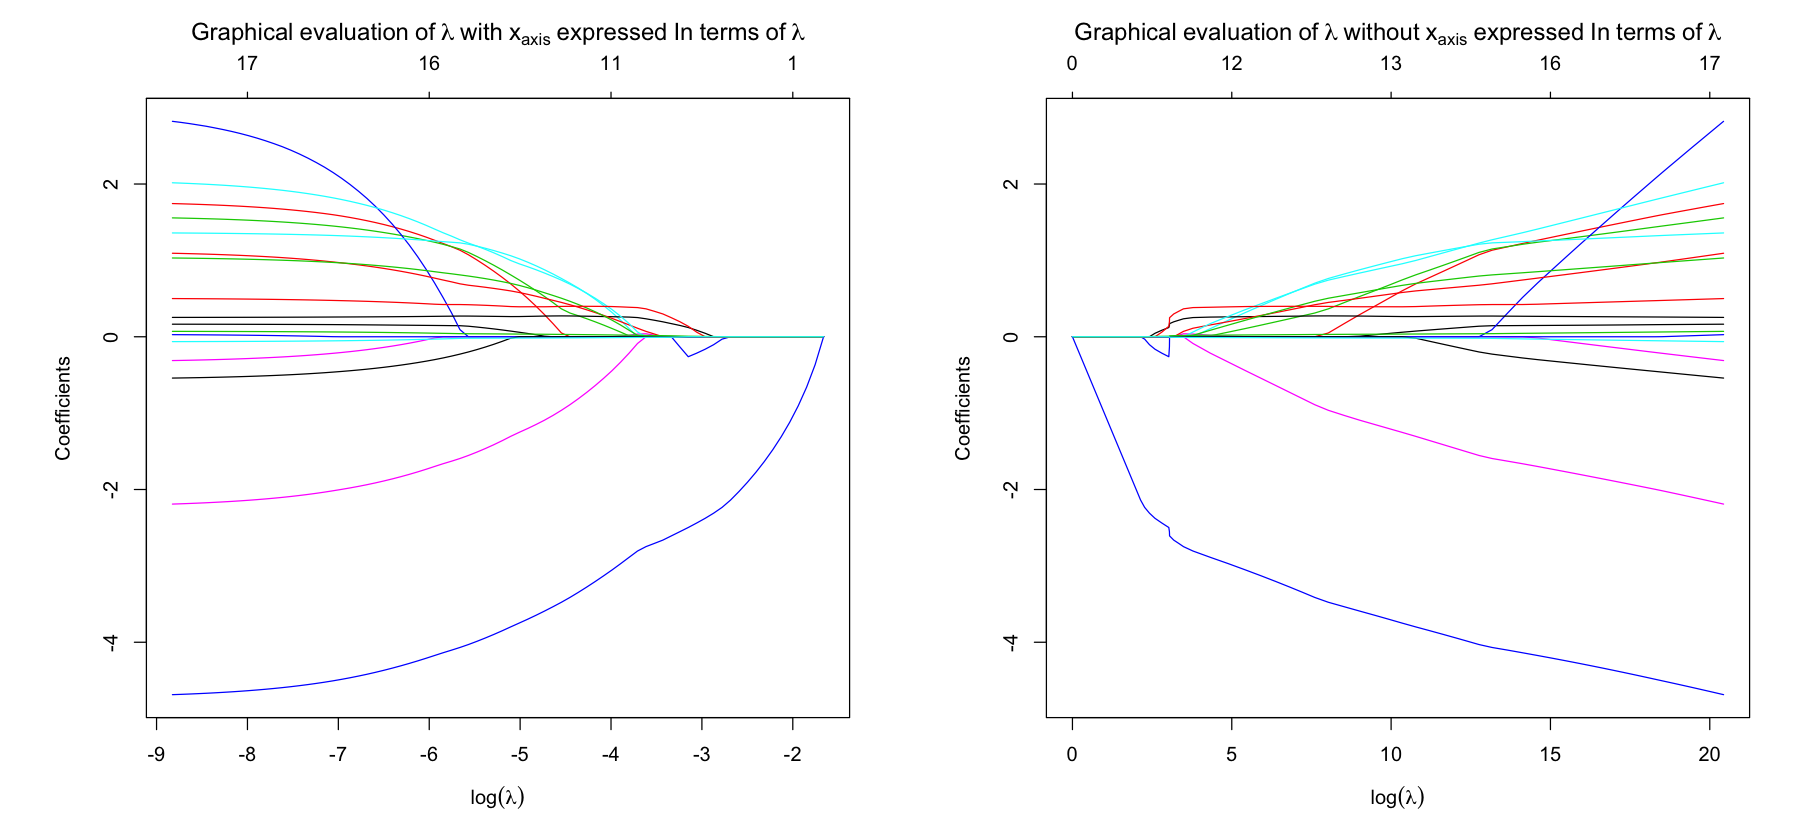

In [284]:
m.lasso <- glmnet(X, y, alpha=1,family="binomial")
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.014\
And the MSE is:0.83

[1] 0.01402993

[1] 0.8308759

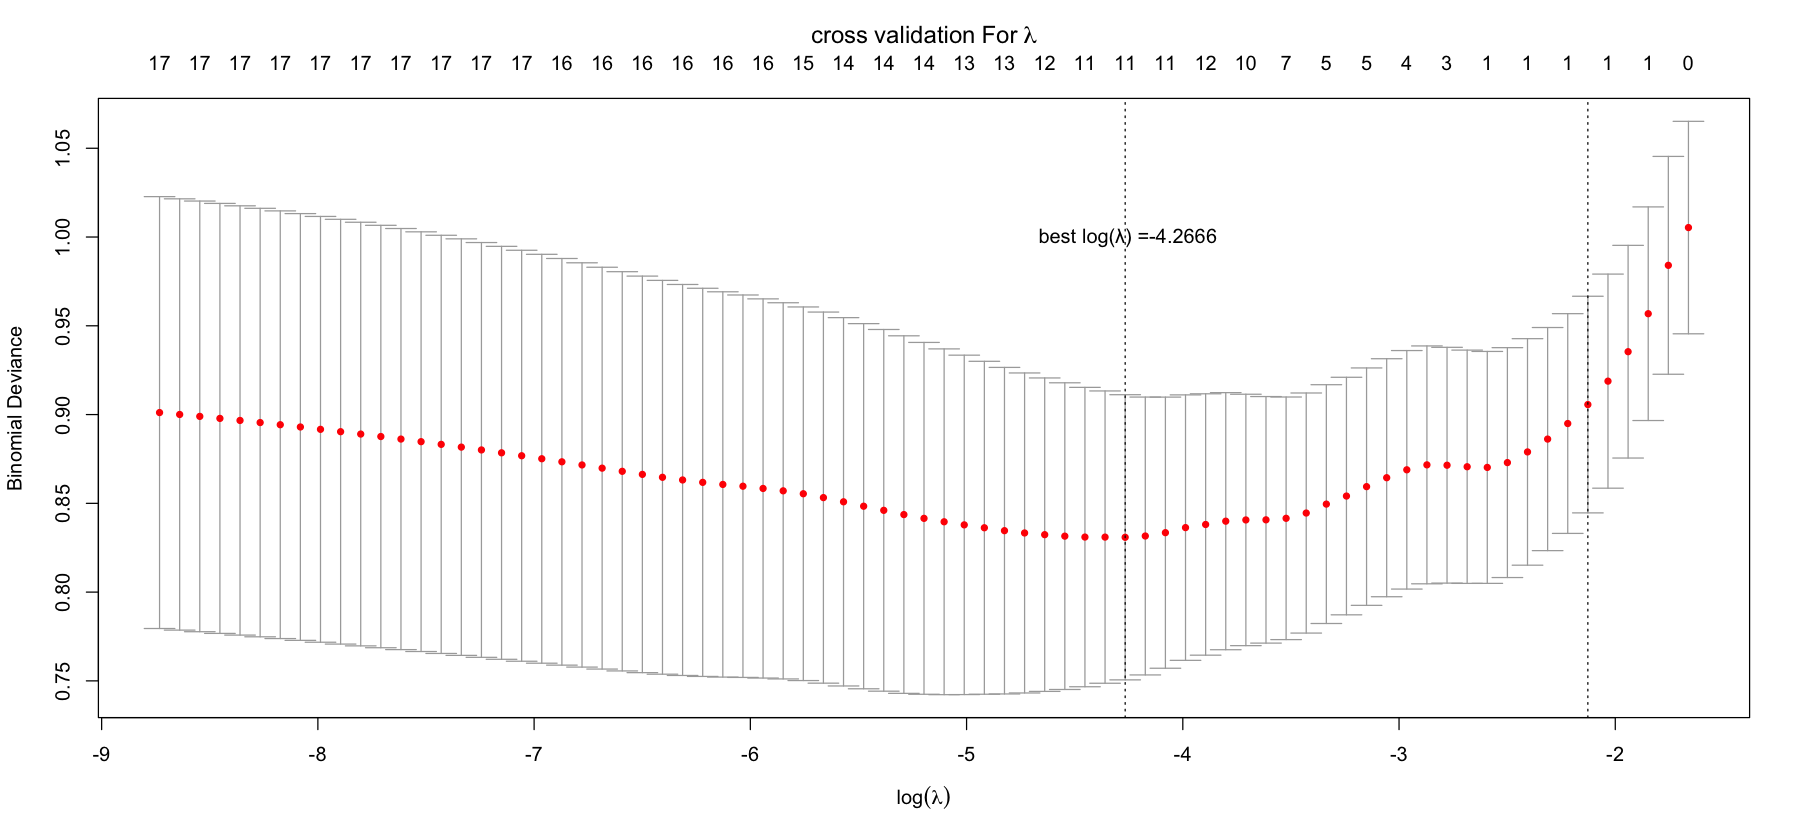

In [285]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1,family="binomial")
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min), y=1, paste0(" best log(λ) =",round((log(cv.lasso$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse

On the basis of MSE , the model fitted with ridge is preferable by the way since the MSE is almost equal we rather lasso since it performs model selection and the explained deviance is higher.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model , graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.34 \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular ccreatinineHiYes, bicarbonateLowYes  ,pO2lowYes   ,renalYes, raceOther , sexMale have been removed.
Also serviceSurgical has been removed but we must be careful since the interactions with age is significant so we should keep it based on principle of hierarcy.


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 1, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,] 11 0.2877 0.01403

18 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)         -0.21189598
sexMale              .         
raceOther            .         
raceWhite            0.23606718
serviceSurgical      .         
cancerYes            0.56756956
renalYes             .         
infectionYes         0.26898602
cprYes               0.35258088
previousYes          0.37668581
pO2lowYes            .         
pHlowYes             0.57087677
pCO2hiYes           -0.72819542
bicarbonateLowYes    .         
creatinineHiYes      0.39835867
age                  0.02750738
consciousYes        -3.27734672
serviceSurgical:age -0.01322550

[1] 12

[1] 0.3387641

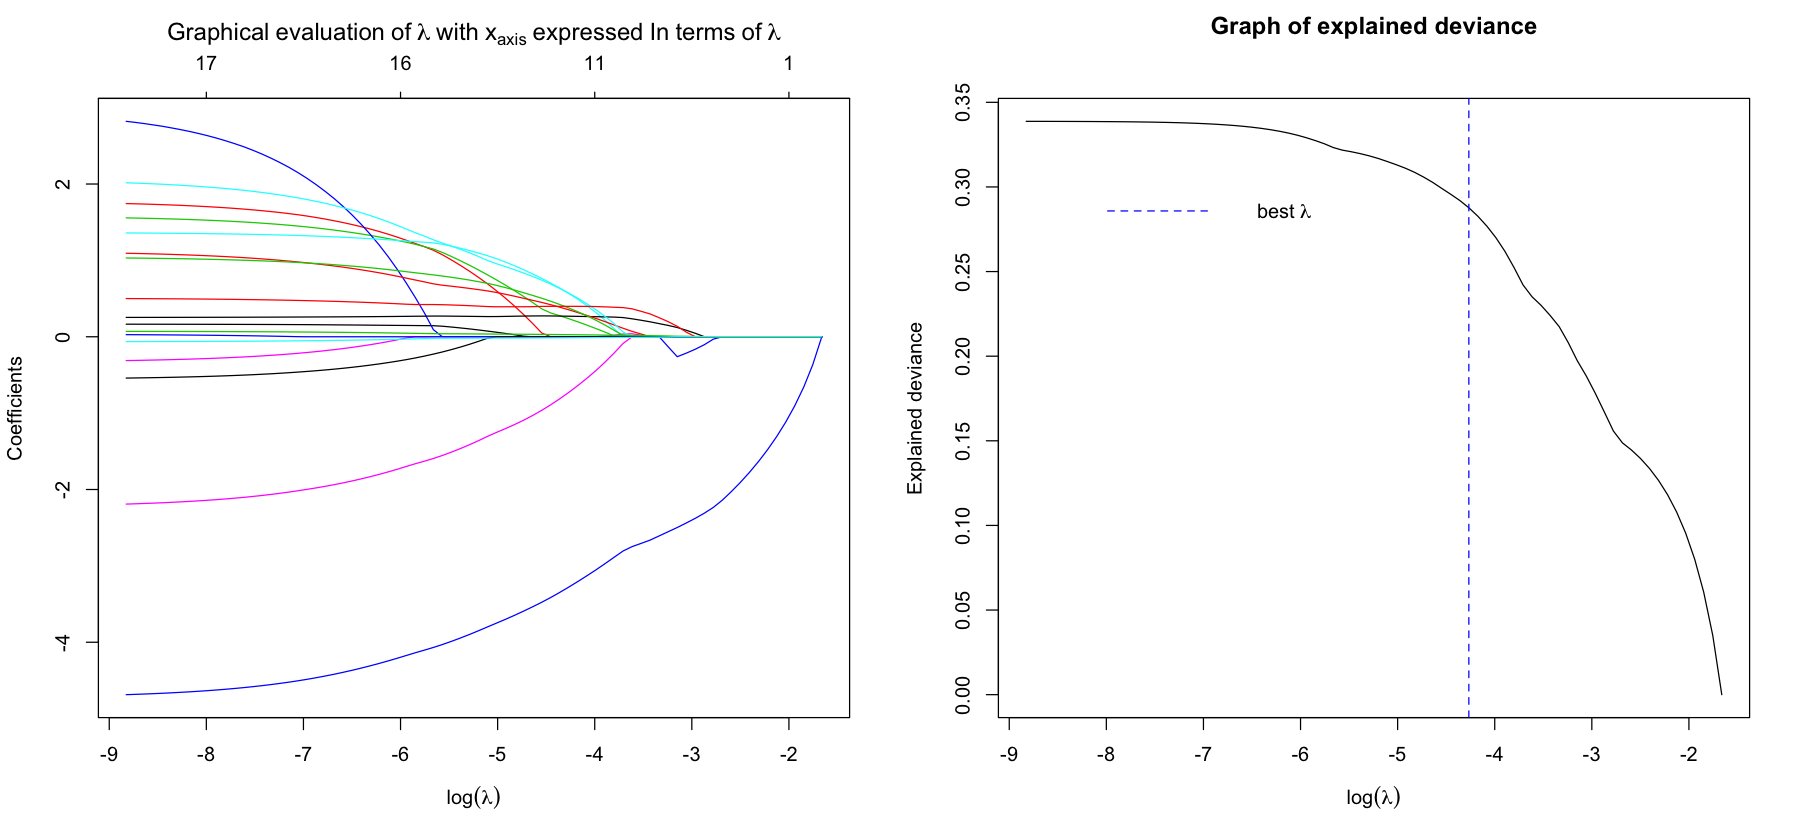

In [286]:
#### best model

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda,family="binomial")
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x =-8.5,bty="n", y=0.3)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

### PRINCIPAL COMPONENT ANALYSIS
Let's consider Principal component analysis in order to see if it is useful. Since 'prcomp' command require numeric values, all the qualitative varibales have been transformed into numeric. So forn example the "FALSE" becomes 1 and "TRUE" becomes 2. I report the first three rows of the dataset before and after the transformation in order to make clear this passage.


Then evalute whether the PC analysis can help the interpretation of the relationships between the covariates and the  response taking. We have 15 PCsC. 
Let's also plot a result fot PC1 and PC2. The plot shows the values of the scores as numbers associated to each observation in the dataset. In particular we want to understand if there are observation that are not clusterize with other observations (194 for example could be a possible outlier) and in this case we see for example 185 or 194 that could be outliers, meaning that probabibly some outlier is present.  Each PC explained an amount of deviance of the dataset (PC1 the most). The read lines are the loadings (1 for each covariate). They all start from (0,0). We see that th mprating vector is almost parallel to PC2 meaning that this particular variable contributes significantly to the explained deviance for the second PC. So first of all we look for the loadings parallel to our axis. In this case for example service it's the most significant for the PC1 while as  said before previous for PC2.

Let's also look for angle $\alpha$ between two variable's loadings:

- if $\alpha$ $\rightarrow$ 0 the variables are positively correlated

- if $\alpha$ $\rightarrow$ 90 the variables are not correlated

- if $\alpha$ $\rightarrow$ 180 the variables are negatively correlated

So in this case for example cancer and conscious are correlated positively, previous and infection not correlated and infection and service negatively correlated.

In [324]:
library(pls)
set.seed(222)
#pairs(mydata[,-1], col = mydata$taking, upper.panel = NULL, pch = 16, cex = 0.5)
#legend("topright", bty = "n", legend = c("talinkg=0","taking=1"),
  #      pch = 16, col = c("black","red"))
mydata[1:3,]
mydata <- data.frame(sapply(mydata, as.numeric))
mydata[1:3,]
m.pcr <- prcomp(mydata[,-13], scale=TRUE)

dim(m.pcr$x)

sex,race,service,cancer,renal,infection,cpr,previous,pO2low,pHlow,pCO2hi,bicarbonateLow,creatinineHi,status,age,conscious
1,3,1,1,1,2,1,1,1,1,1,1,1,1,27,2
2,3,1,1,1,1,1,2,1,1,1,1,1,1,59,2
2,3,2,1,1,1,1,1,1,1,1,1,1,1,77,2


sex,race,service,cancer,renal,infection,cpr,previous,pO2low,pHlow,pCO2hi,bicarbonateLow,creatinineHi,status,age,conscious
1,3,1,1,1,2,1,1,1,1,1,1,1,1,27,2
2,3,1,1,1,1,1,2,1,1,1,1,1,1,59,2
2,3,2,1,1,1,1,1,1,1,1,1,1,1,77,2


[1] 200  15

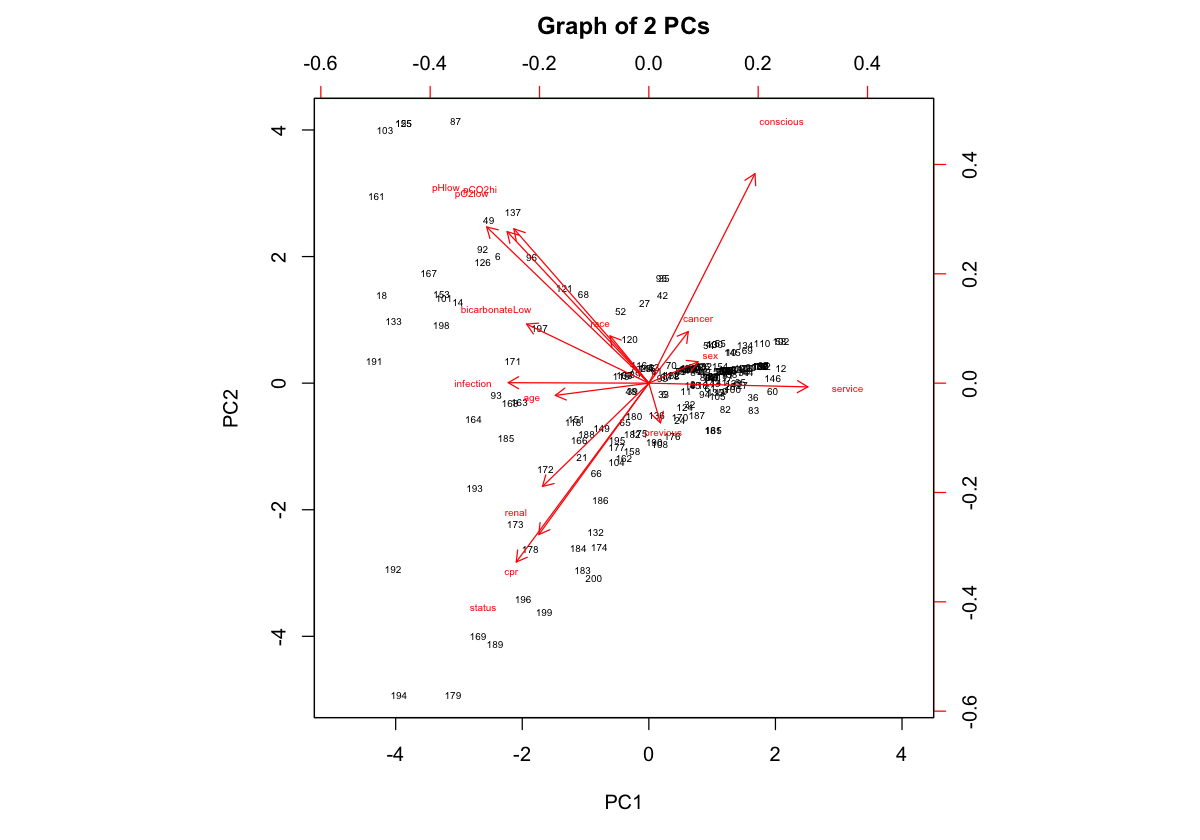

In [323]:
options(repr.plot.width = 10, repr.plot.height = 7)
biplot(m.pcr, scale=0, cex=0.5)
title ("Graph of 2 PCs",line=2.7)

Let's plot the clusterization based on taking for the first two PCs. PC1 and PC2 somehow clusterize the point even if we have a partial overlapping. So it is not so bad. By the way thing could be improve

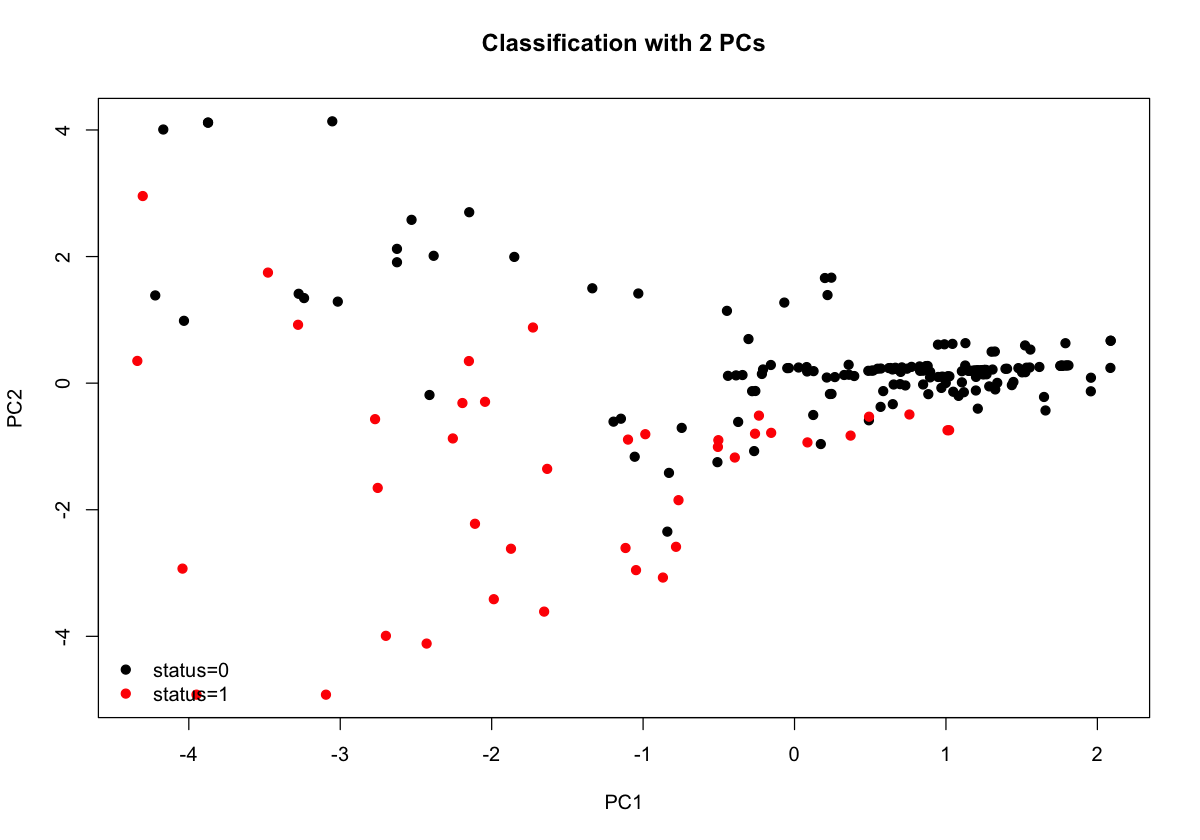

In [325]:
plot(m.pcr$x[,1:2], pch=19,col=mydata$status)
legend('bottomleft', pch=c(19,19), col=c(1,2),
        legend=c('status=0', 'status=1'), bty='n')
title ("Classification with 2 PCs",line=2)

Now we plot the explained deviance for the PCs.

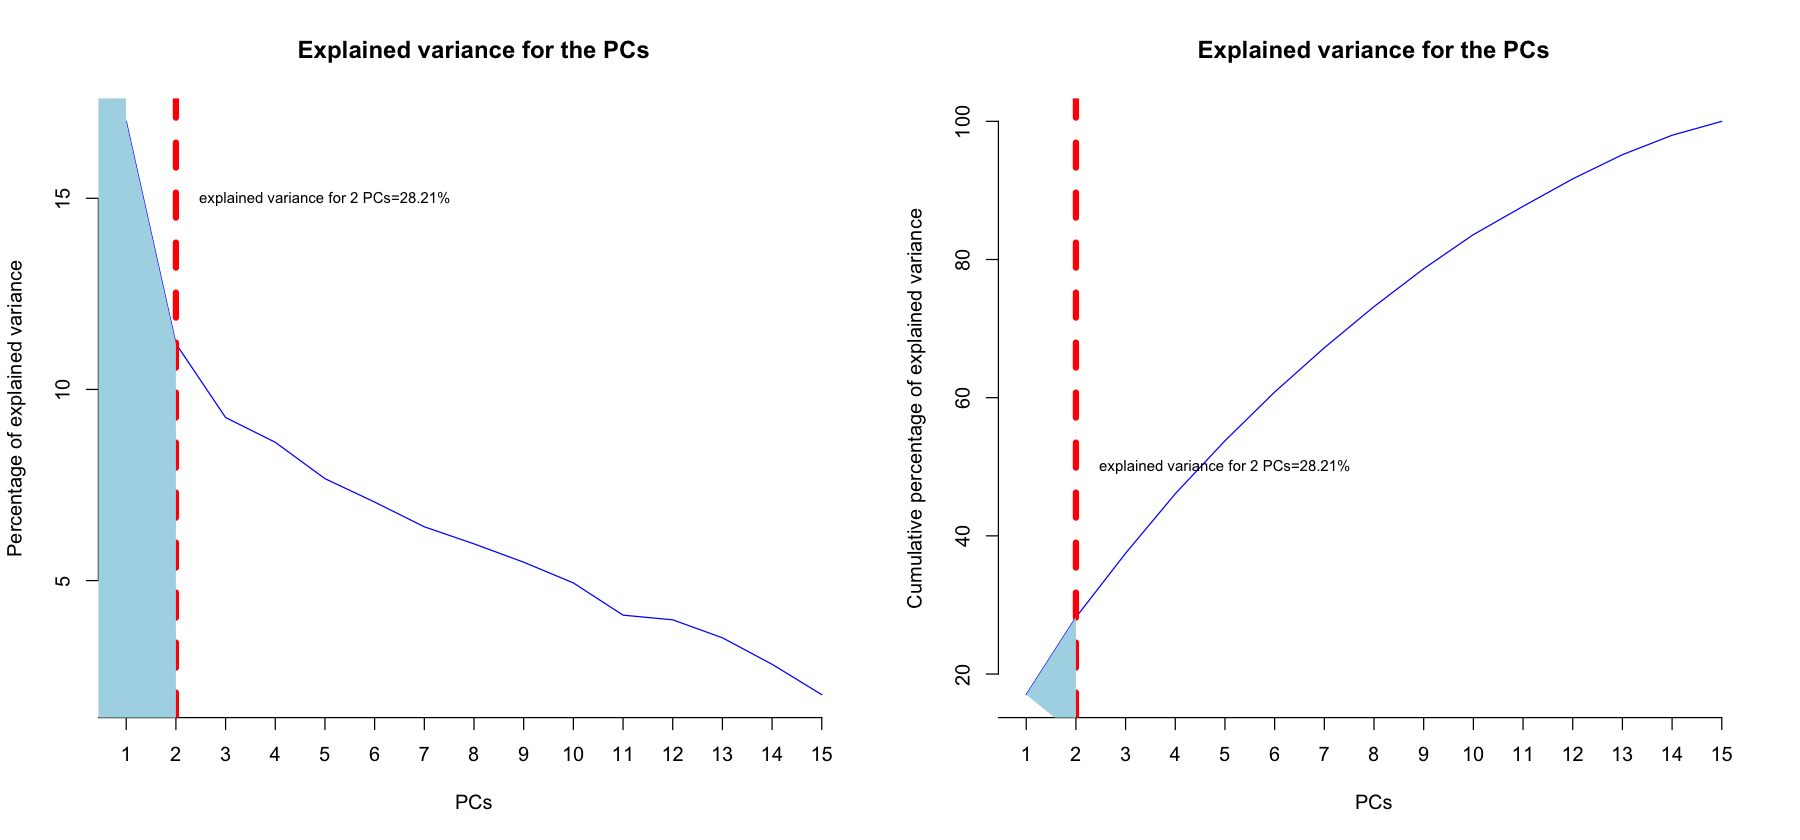

In [329]:
## explained variance
#explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:2])

## plot:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(1:15, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=0:15)
axis(2)
text(x=5, y=15,cex=0.75,paste0("explained variance for 2 PCs=",round(sum,2),"%"))
abline(v=2, col="red",lt=2,lw=5)



x2 = c(0,0,1:2,2)
y2 = c(0,100,explvar(m.pcr)[1:2],0)
polygon(x2,y2, col="lightblue", border=NA)


plot(1:15, cumsum(explvar(m.pcr)), ylab='Cumulative percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=0:15)
axis(2)
text(x=5, y=50,cex=0.75,paste0("explained variance for 2 PCs=",round(sum,2),"%"))
abline(v=2, col="red",lt=2,lw=5)



x2 = c(0,2,1:2,2)
y2 = c(0,sum,explvar(m.pcr)[1:2],sum)
polygon(x2,y2, col="lightblue", border=NA)

Finally we compute the MSE considering 2 components which is equal to: 3.19. This is pretty high meaning that as shown in the clustering plot above the PCA is not satisfactory

In [332]:
pcr.pred=predict(m.pcr,mydata,ncomp=2)
mean((pcr.pred-mydata$status)^2)

[1] 2.649627

### CONCLUSION POINT 2

Based the MSE  for the different methods are:
- 0.82 for Ridge
- 0.83 for Lasso
- 2.65 for PCA 

While the explained deviance:

- 0.31 for Ridge
- 0.34 for Lasso
- 0.28 for PCA ( 2 components)


So we can say that  based in MSE and explained deviance lasso is the best approach. It is important to underling that  for PCA explained deviance is for 2 components meaning that the model with 2 PCs is far simpler than the lasso with consists of 12 variables (this is why probably the performances are bad). By the way, based on lasso, the variables that are connected to status are all except for ccreatinineHiYes, bicarbonateLowYes  ,pO2lowYes   ,renalYes, raceOther , sexMale .
Also serviceSurgical has been removed but we must be careful since the interactions with age is significant so we should keep it based on principle of hierarcy.